## Advanced Linear Regression Assignment

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

The company is looking at prospective properties to buy to enter the market.
The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

### Business Goal

Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Finding the optimal value using Ridge and Lasso Regression

#### Import required Libraries

In [130]:
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import DataFrame

#For Regression model building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

#To filter warnings
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [131]:
houseprice_df = pd.read_csv('train.csv')
houseprice_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [132]:
houseprice_df.shape

(1460, 81)

In [133]:
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [134]:
houseprice_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

There are 81 columns and 1460 rows in the data set. Out of which 38 seems to be numerical dataset.
We can also observe there are columns related to year.

In [7]:
#Auto EDA 
import sweetviz as sv 
sweet_report = sv.analyze(houseprice_df,pairwise_analysis="off") 
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Null check and imputing the dataset

In [135]:
## Percentage of missing values
print('Percentage of Missing Values:')
round(houseprice_df.isnull().sum()/len(houseprice_df.index)*100,2).sort_values(ascending=False)[round(houseprice_df.isnull().sum()/len(houseprice_df.index),2) > 0 ] 

Percentage of Missing Values:


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64

#### There are 18 columns with null values, among them 5 columns have more than 45% but going through data definition of the features, it seems like those features may not be present in house because of which it is left blank. Hence we impute them with NA or None to indicate absence of that feature.

In [136]:
null_percentage = round(houseprice_df.isnull().sum()/len(houseprice_df.index),4)*100
null_columns = null_percentage[(round(houseprice_df.isnull().sum()/len(houseprice_df.index),4)*100).values > 0].index
null_columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

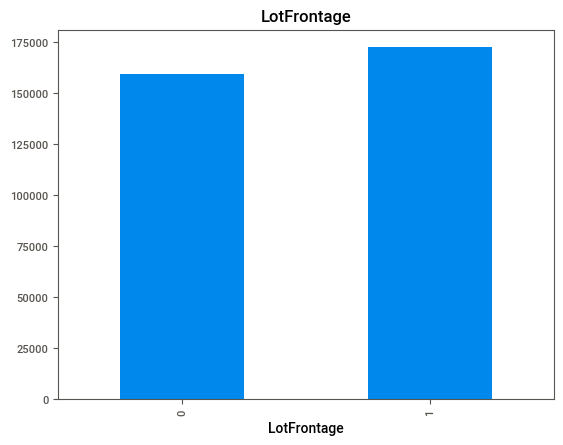

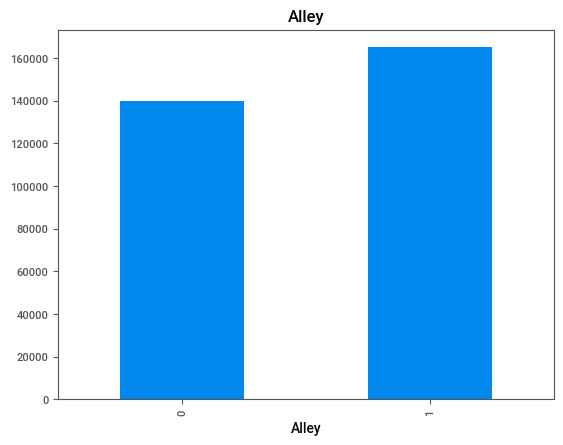

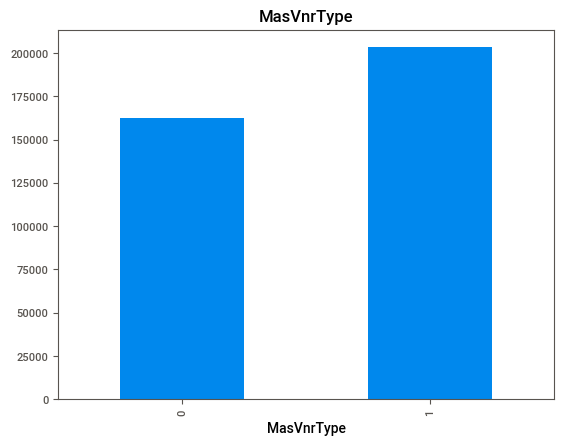

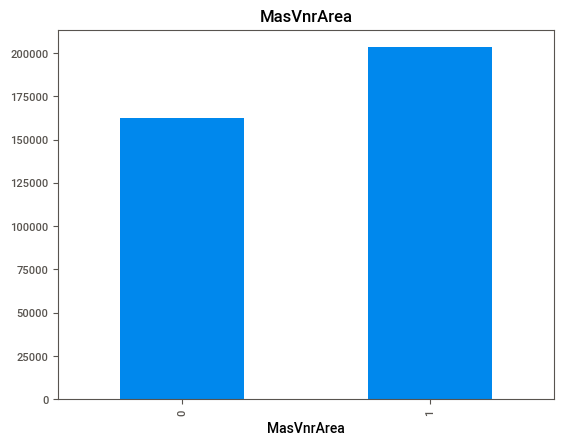

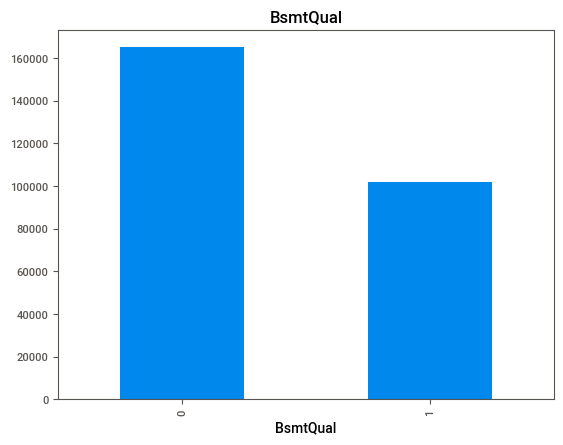

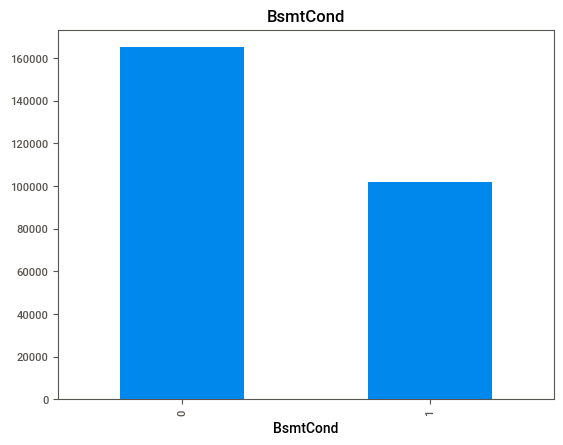

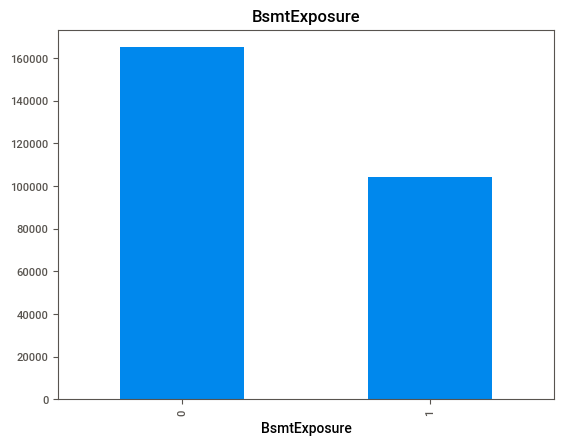

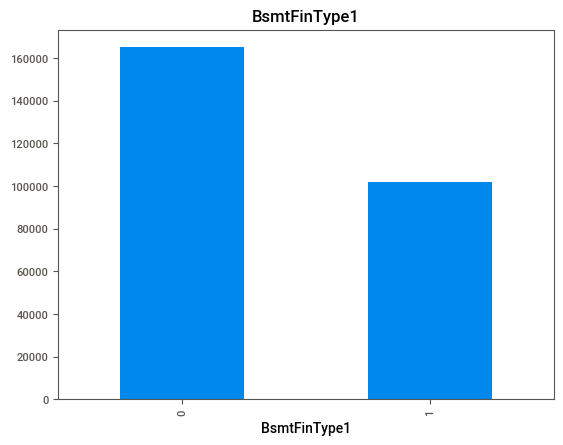

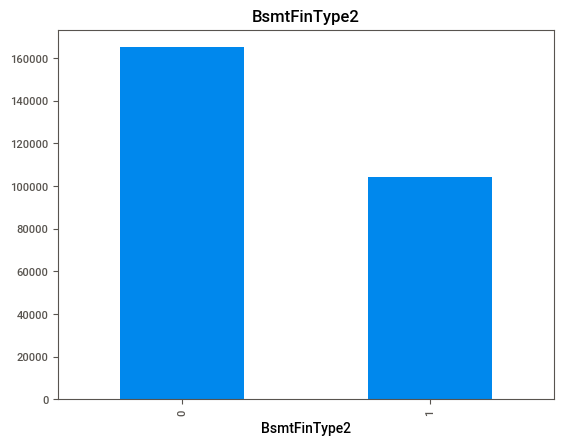

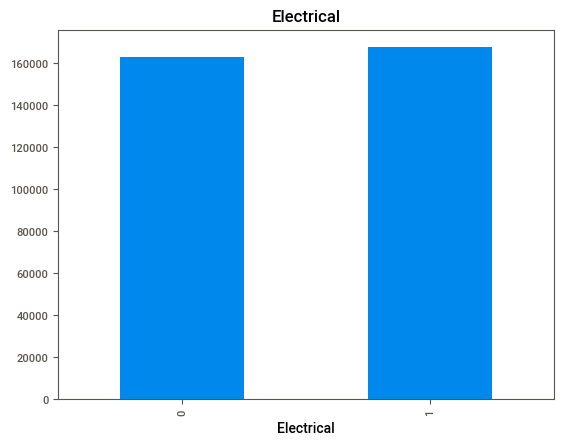

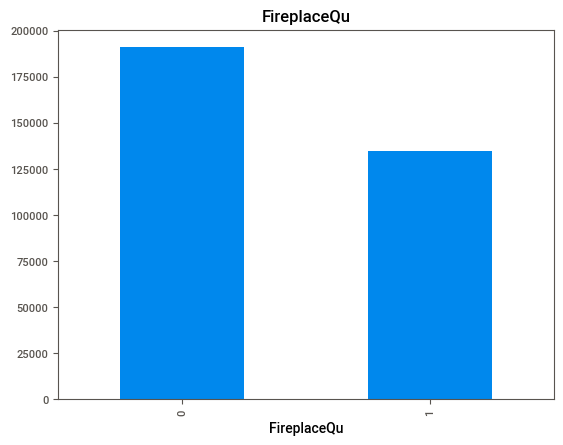

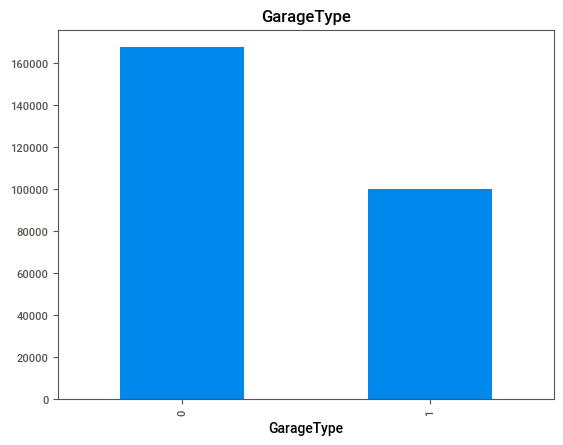

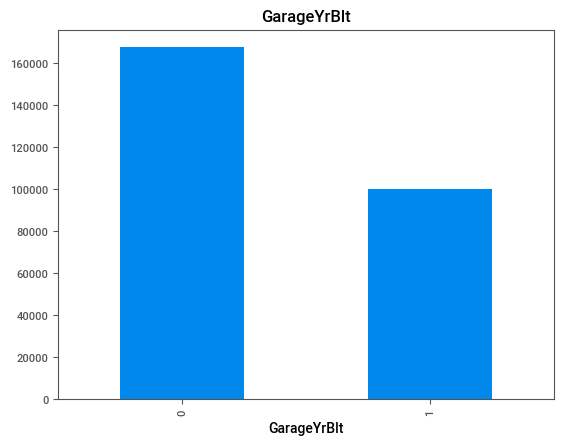

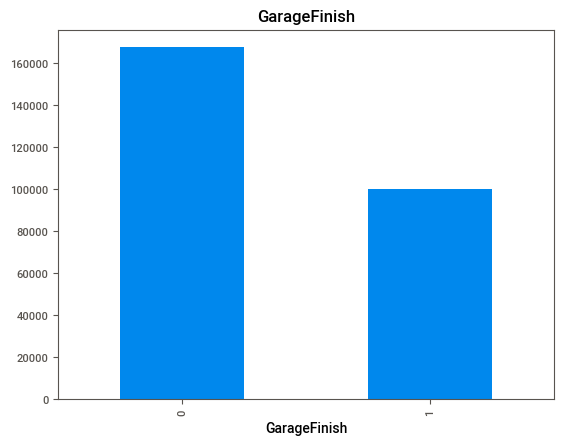

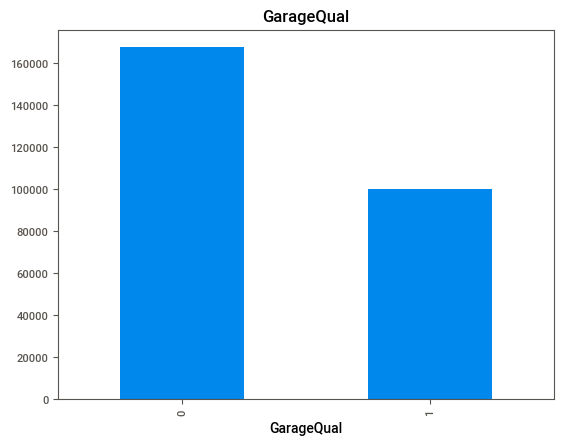

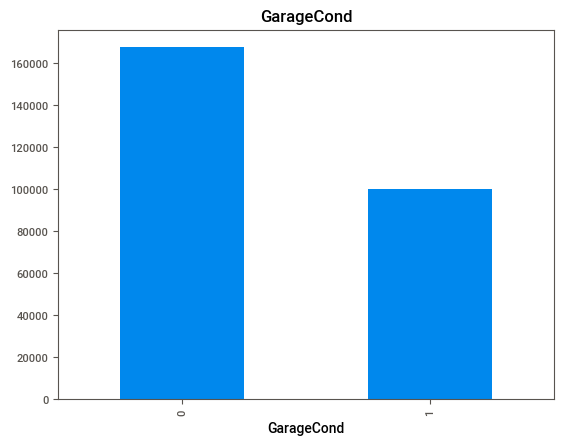

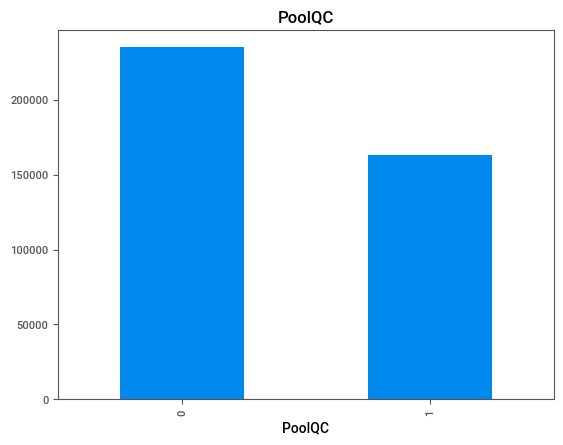

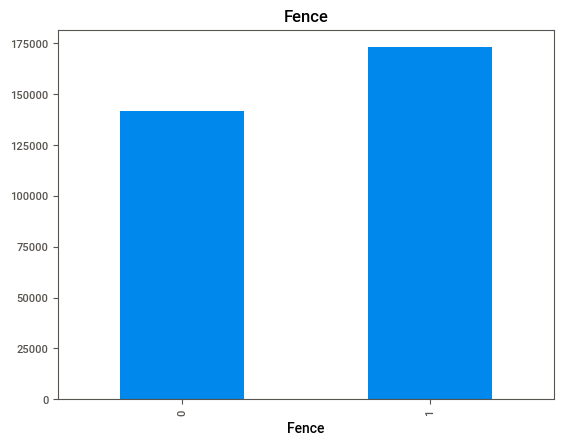

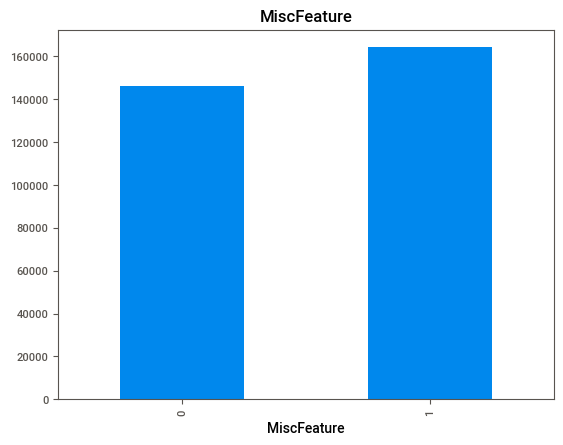

In [11]:
for col in null_columns:
    data = houseprice_df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[col] = np.where(data[col].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(col)['SalePrice'].median().plot.bar()
    plt.title(col)
    plt.show()

From the above graph we can infer that null values has impact on sales price. Hence we have to impute them.

Checking how the squarefoot or size of the house impacts SalePrice

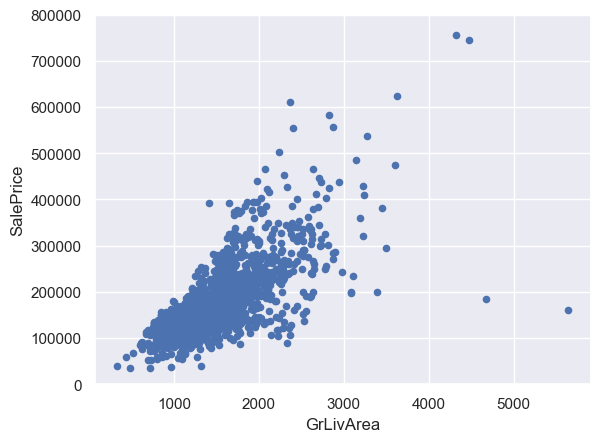

In [137]:
var = 'GrLivArea'
data = pd.concat([houseprice_df['SalePrice'], houseprice_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

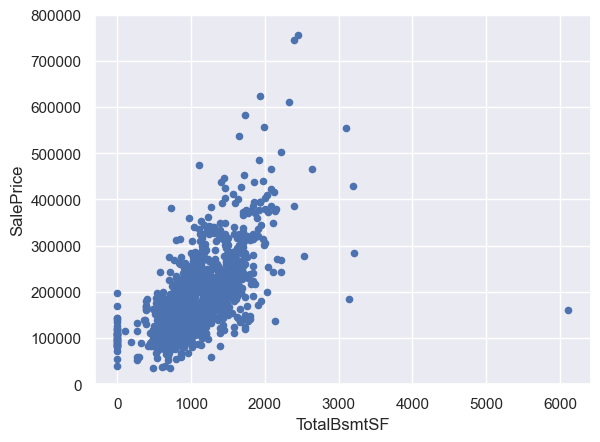

In [138]:
var = 'TotalBsmtSF'
data = pd.concat([houseprice_df['SalePrice'], houseprice_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

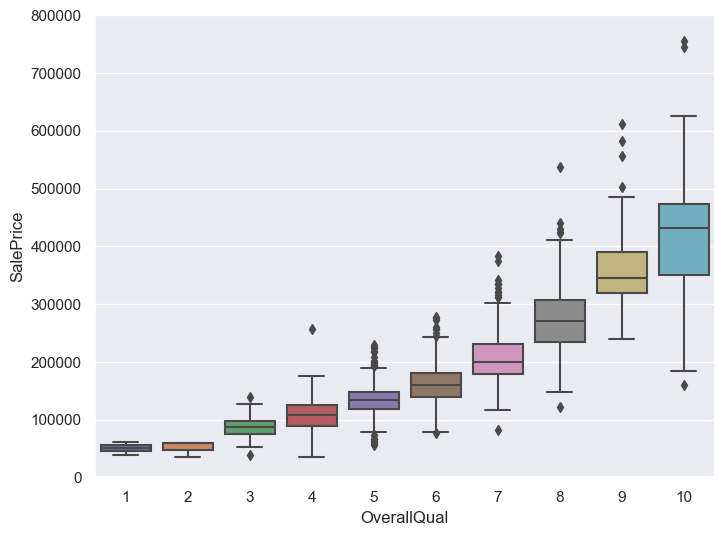

In [139]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([houseprice_df['SalePrice'], houseprice_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#### From the above graphs of few features:

With over quality median of sale price increases.

Size increase in sqarefoot of house and its basement have somehat linear relationship with the salesprice.



## Imputing the null values 

In [140]:
#NA = No Pool for PoolQC
houseprice_df['PoolQC'] = houseprice_df['PoolQC'].fillna('None')
#NA = No Misc Feature for MiscFeature
houseprice_df['MiscFeature'] = houseprice_df['MiscFeature'].fillna('None')
#NA = No Alley
houseprice_df['Alley'] = houseprice_df['Alley'].fillna('None')
#NA = No Fireplace for FireplaceQu
houseprice_df['FireplaceQu'] = houseprice_df['FireplaceQu'].fillna('None')
#NA = No Fence
houseprice_df['Fence'] = houseprice_df['Fence'].fillna('None')
#NA = No Fireplace
houseprice_df['FireplaceQu'] = houseprice_df['FireplaceQu'].fillna('None')
#NA = No Garage
houseprice_df['GarageCond'] = houseprice_df['GarageCond'].fillna('None')
houseprice_df['GarageType'] = houseprice_df['GarageType'].fillna('None')
houseprice_df['GarageFinish'] = houseprice_df['GarageFinish'].fillna('None')
houseprice_df['GarageQual'] = houseprice_df['GarageQual'].fillna('None')
houseprice_df['garage_age'] = houseprice_df['GarageQual'].fillna(0)   #No Garage No Age
#NA = No Basement
houseprice_df['BsmtExposure'] = houseprice_df['BsmtExposure'].fillna('None')
houseprice_df['BsmtFinType2'] = houseprice_df['BsmtFinType2'].fillna('None')
houseprice_df['BsmtCond'] = houseprice_df['BsmtCond'].fillna('None')
houseprice_df['BsmtQual'] = houseprice_df['BsmtQual'].fillna('None')
houseprice_df['BsmtFinType1'] = houseprice_df['BsmtFinType1'].fillna('None')
#NA = No Masonery Area
houseprice_df['MasVnrType'] = houseprice_df['MasVnrType'].fillna('None')
houseprice_df['MasVnrArea'] = houseprice_df['MasVnrArea'].fillna(0)

houseprice_df['LotFrontage'] = houseprice_df['LotFrontage'].fillna(houseprice_df['LotFrontage'].median())

# Filling the Electrical 0.06% rows with the mode
houseprice_df['Electrical'] = houseprice_df['Electrical'].fillna(houseprice_df['Electrical'].mode()[0])


In [141]:
null_percentage = round(houseprice_df.isnull().sum()/len(houseprice_df.index),4)*100
null_columns = null_percentage[(round(houseprice_df.isnull().sum()/len(houseprice_df.index),4)*100).values > 0].index
null_columns

Index(['GarageYrBlt'], dtype='object')

Before handling missing value for GarageYrBlt, analyzing all the year columns and its impact on SalePrice

Text(0.5, 1.0, 'House Price vs YearSold')

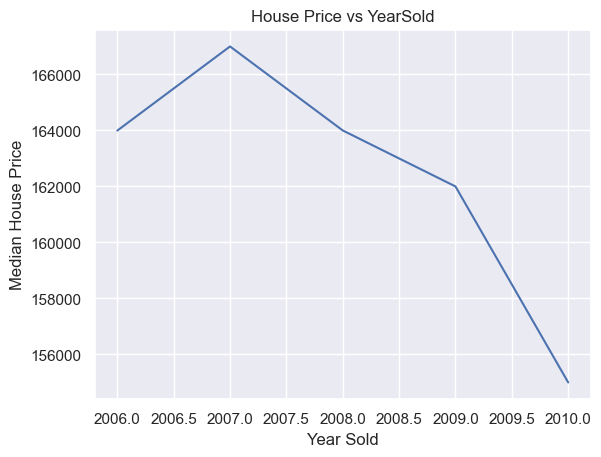

In [142]:
# Chekcing if the median price changes with the year sold
houseprice_df['YrSold'] = houseprice_df['YrSold'].astype('int')
houseprice_df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

We can observe that there is change in house price median with year. We shall analyze other year columns provided in the dataset

In [143]:
# Extracting the Year Features from the Dataset and then checking how the price varies with respect to property age
year_cols = []
for i in houseprice_df.columns:
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        year_cols.append(i)
print('List of features with Year are:')
print(year_cols)

List of features with Year are:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


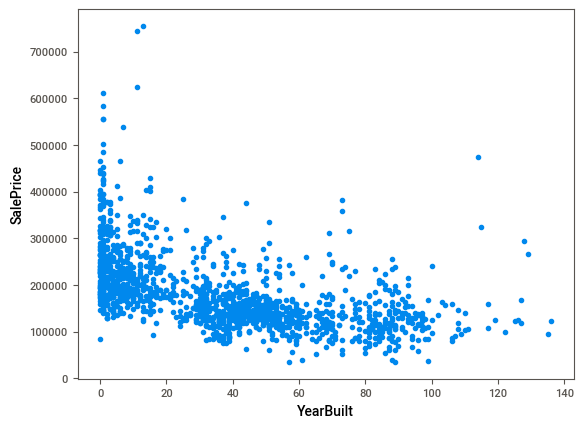

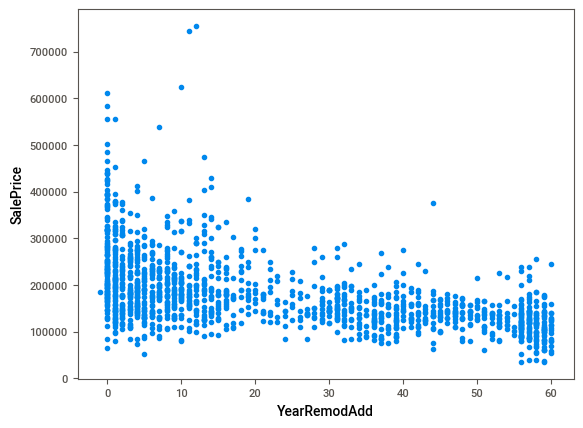

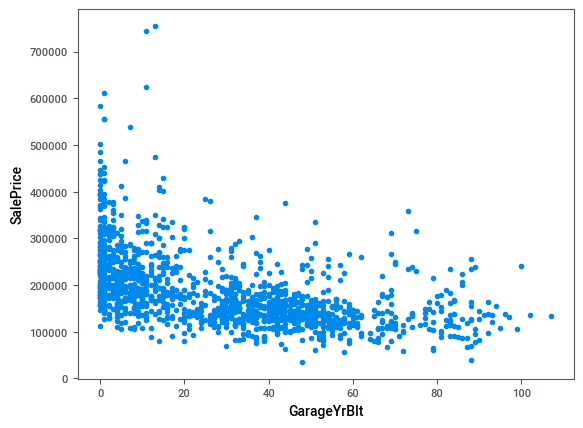

In [24]:
#Comparing the year feature with SalePrice
for feature in year_cols:
    if feature!='YrSold':
        data=houseprice_df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

From the above plots we can infer that as the age of property increase there is decrease in sale price.

In [144]:
# Creating a new Column to determine the age of the property
houseprice_df['age']=houseprice_df['YrSold']-houseprice_df['YearBuilt']
houseprice_df['garage_age'] = houseprice_df['YrSold'] - houseprice_df['GarageYrBlt']
houseprice_df['remodel_age'] = houseprice_df['YrSold'] - houseprice_df['YearRemodAdd']

houseprice_df.drop('GarageYrBlt',axis=1,inplace=True)

In [145]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
houseprice_df[['MSSubClass']] = houseprice_df[['MSSubClass']].astype(str) 
houseprice_df['YrSold'] = houseprice_df['YrSold'].astype(str)
houseprice_df['MoSold'] = houseprice_df['MoSold'].astype(str)
houseprice_df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...        None       0      2   2008       WD   
1         Lvl    AllPub  ...        None       0      5   2007       WD   
2         Lvl    AllPub  ...        None       0      9   2008       WD   
3         Lvl    AllPub  ...        None       0      2   2006       WD   
4         Lvl    AllPub  ...        None       0     12   2008       WD   

  SaleCondition SalePrice  garage_age  age  remodel_age  
0        Normal    208500         5.0    5            5  
1        Normal    181500        31.0   31           31  
2        Normal    223500         7.0    7            6  
3       Abnorml    140000         8.0   91           36  
4        Normal    250000         8.0    8            8  

[5 rows x 83 columns]

In [146]:
# Checking the number of numerical features and the number of categorical features
numerical_columns = []
categorical_columns = []
for i in houseprice_df.columns:
    if houseprice_df[i].dtypes != 'O':
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)
print('Number of numerical columns: ', len(numerical_columns))
print('Number of numerical columns: ', len(categorical_columns))

Number of numerical columns:  37
Number of numerical columns:  46


In [28]:
numerical_columns

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'garage_age',
 'age',
 'remodel_age']

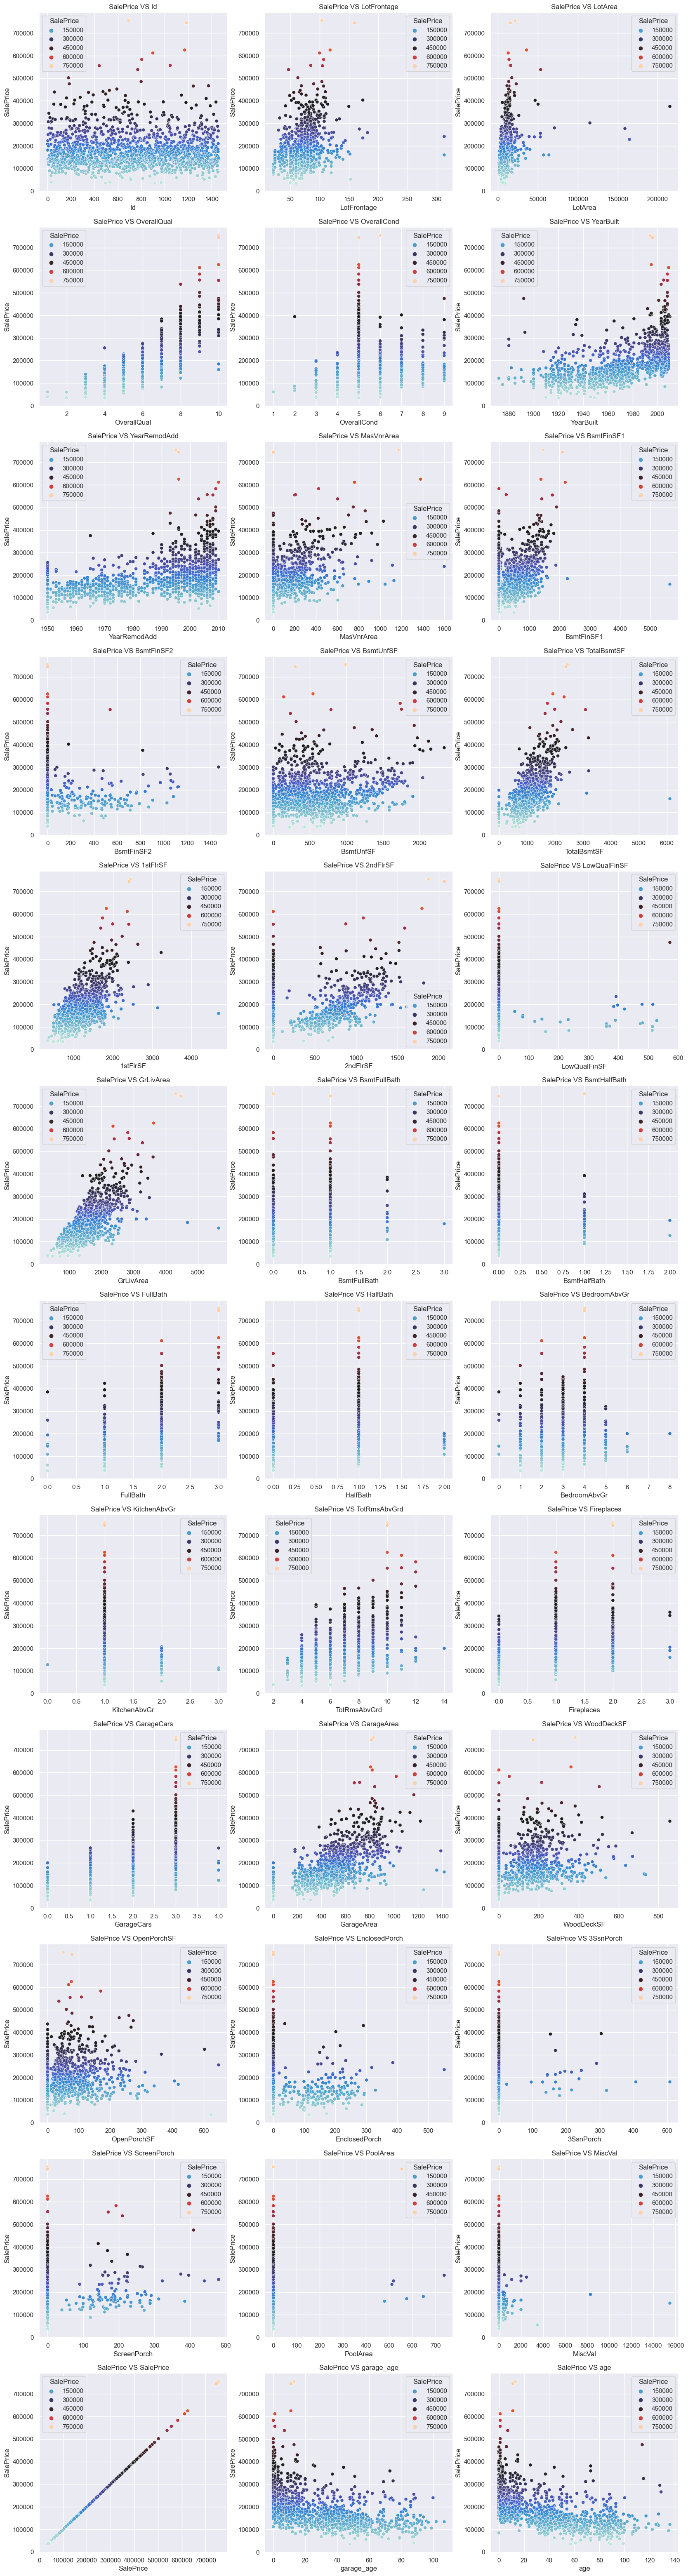

In [147]:
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(houseprice_df[numerical_columns].columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=houseprice_df[numerical_columns],ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

## Inferences from above plots:

New properties are costlier than older properties.

GRLiving Area has a direct corelation with the price of the property.

Total basement area, which is linearly related with the total living area, also is directly proportional to the price of the property.

Month sold has no effect on the price. However the age of property and remodelling has effect on price.

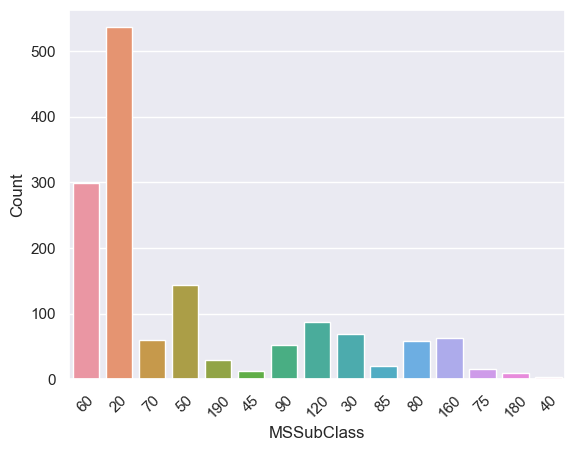

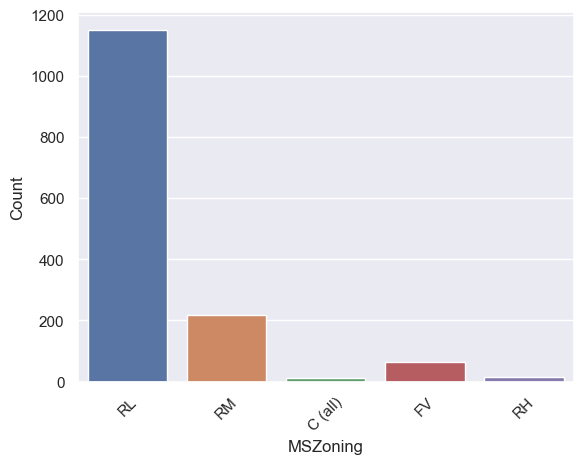

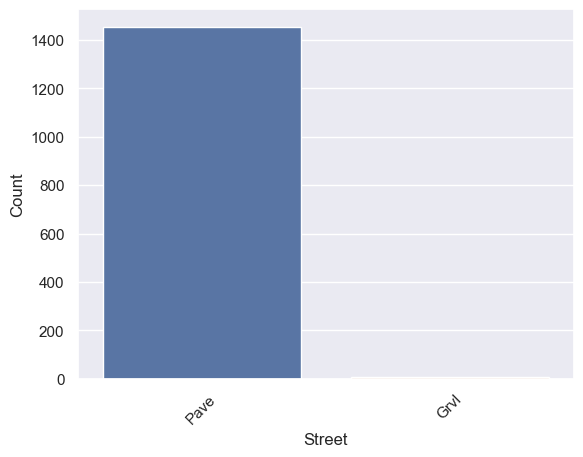

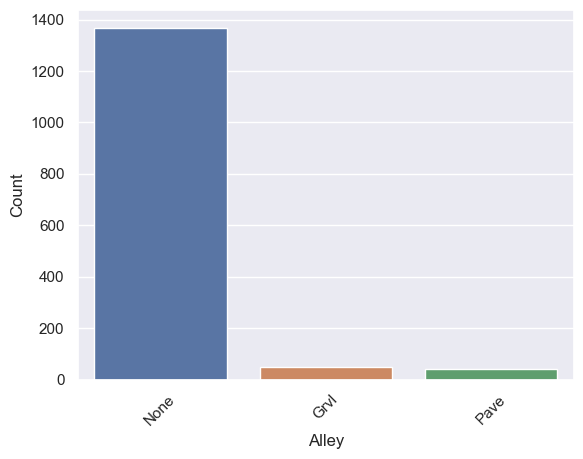

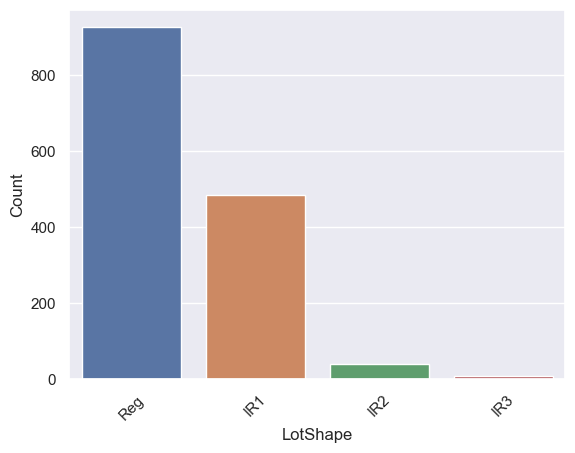

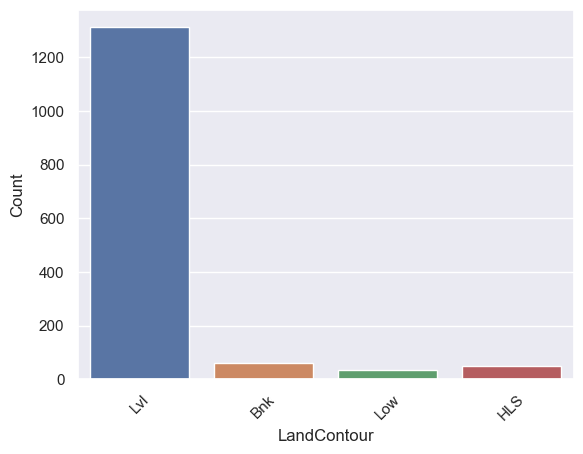

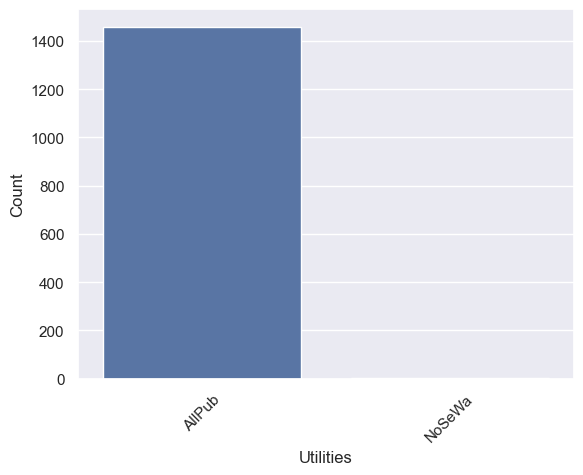

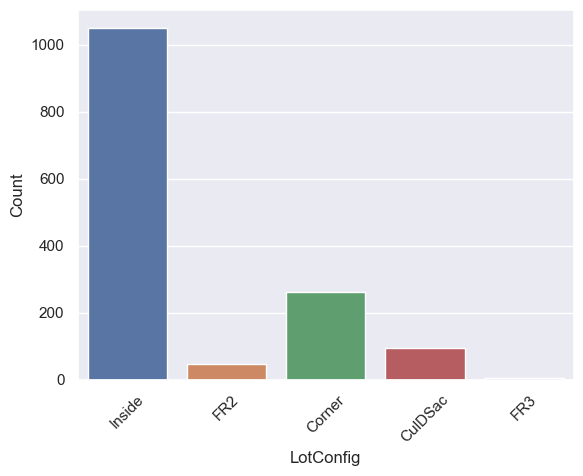

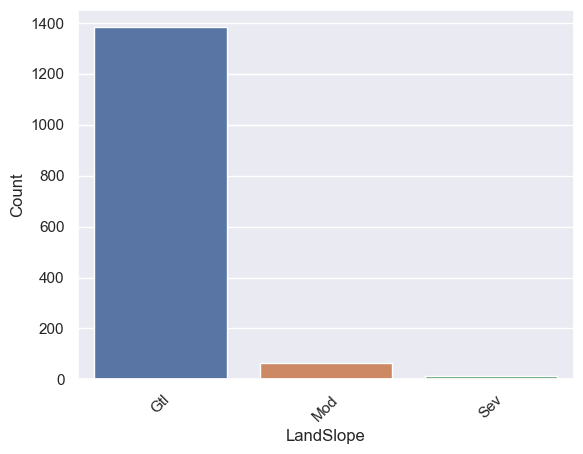

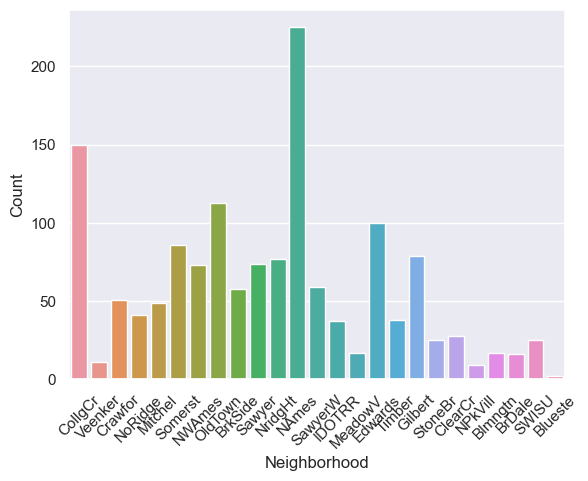

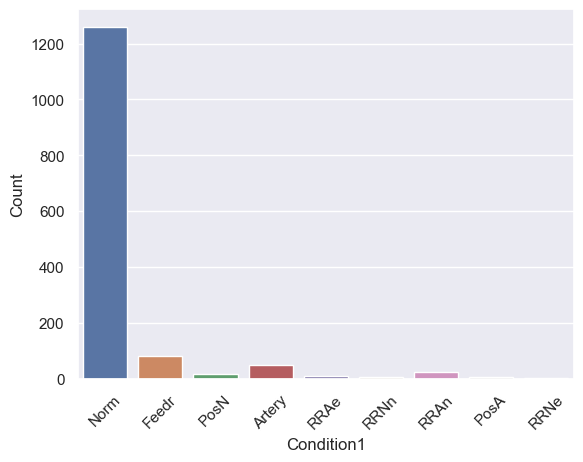

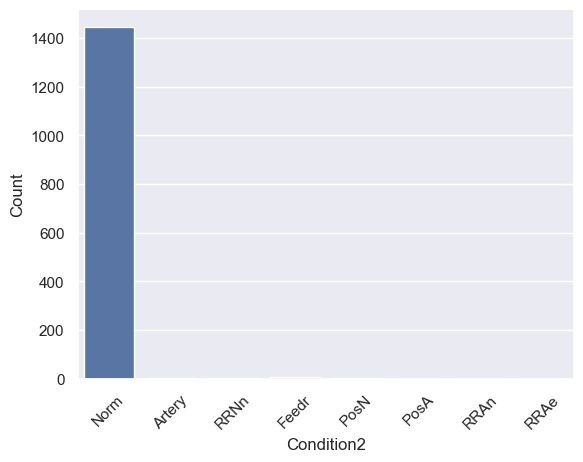

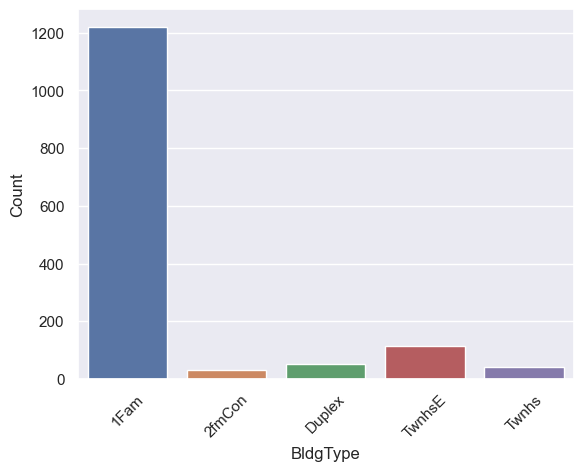

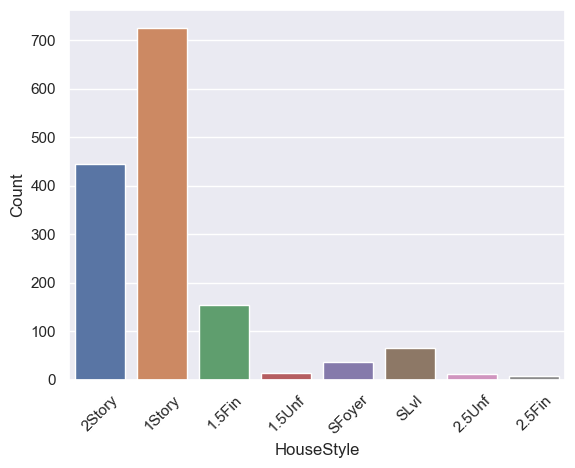

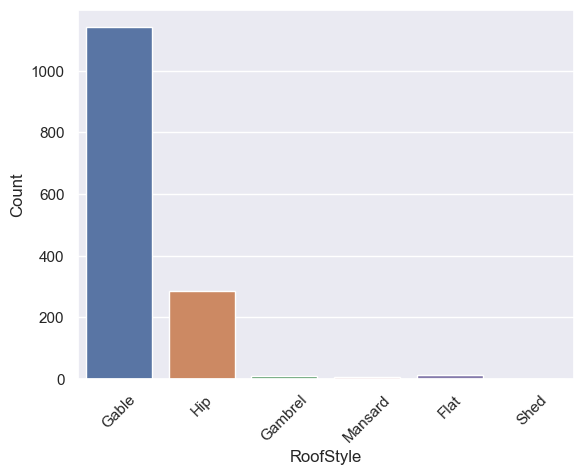

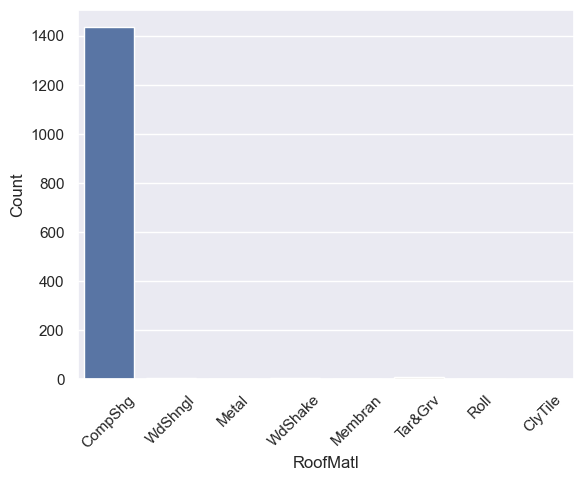

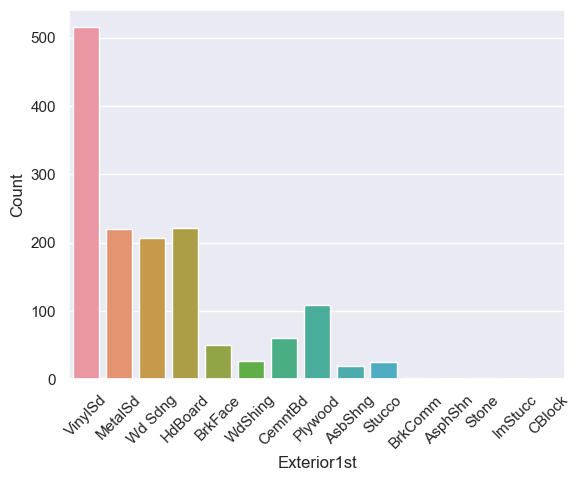

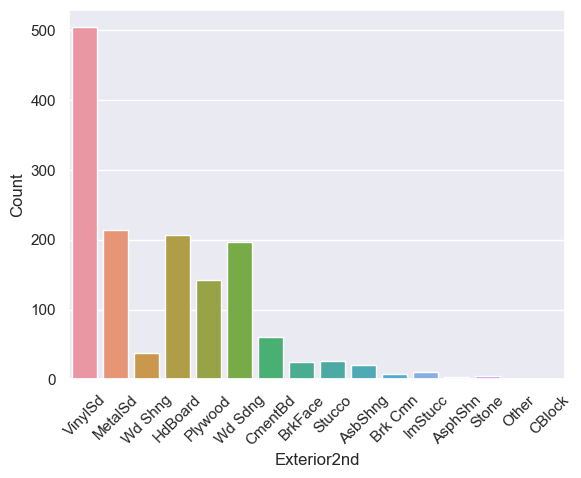

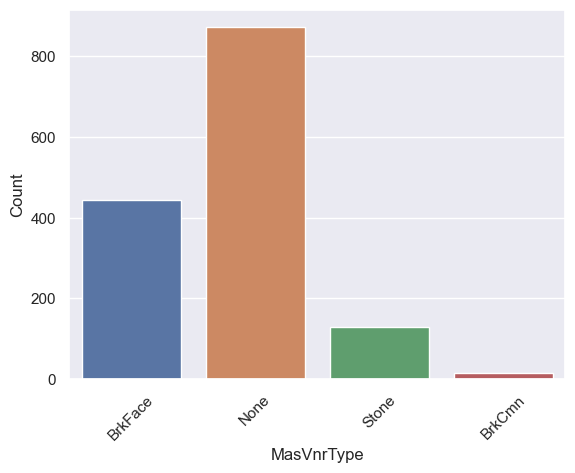

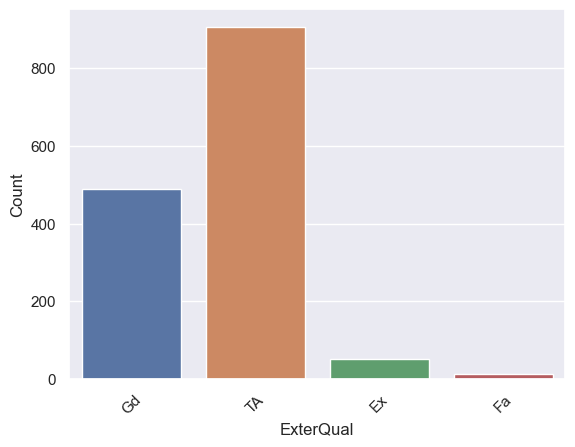

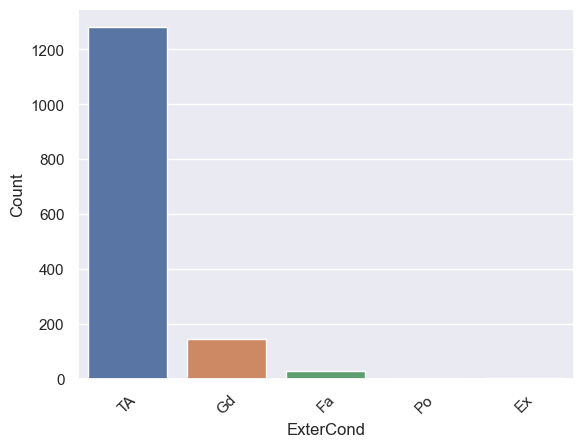

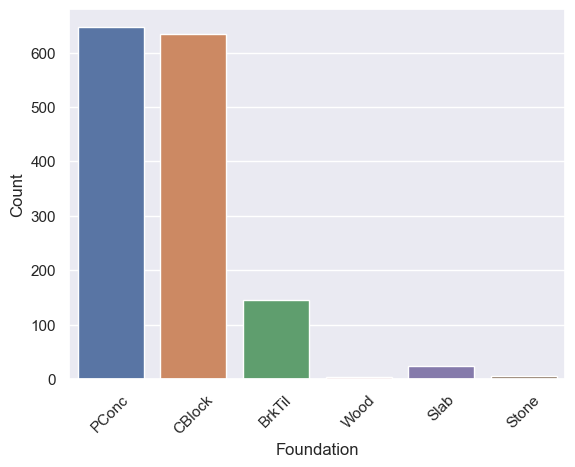

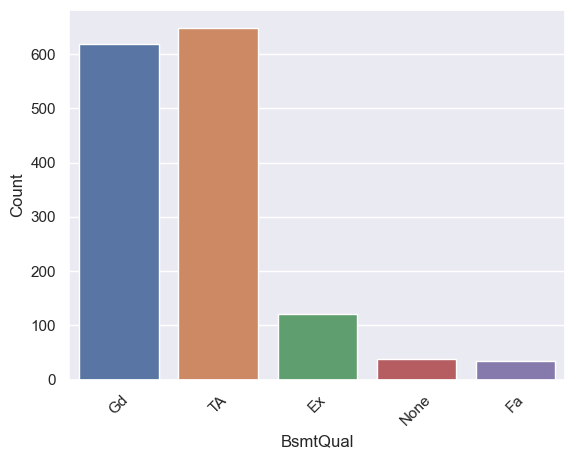

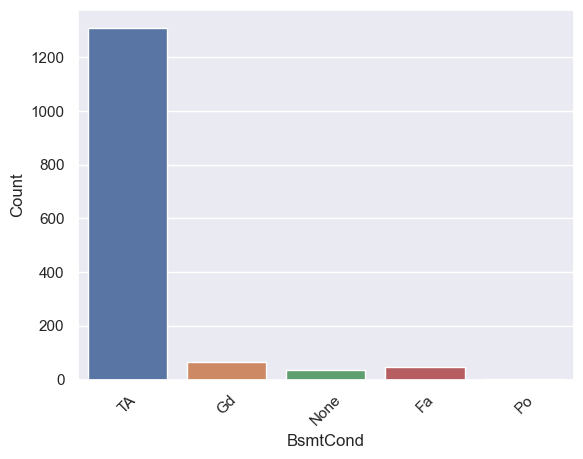

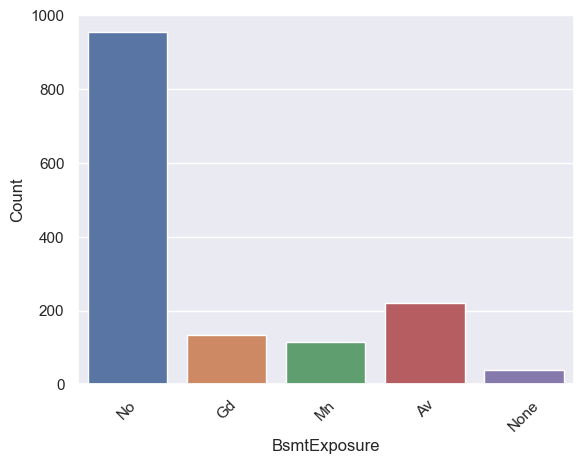

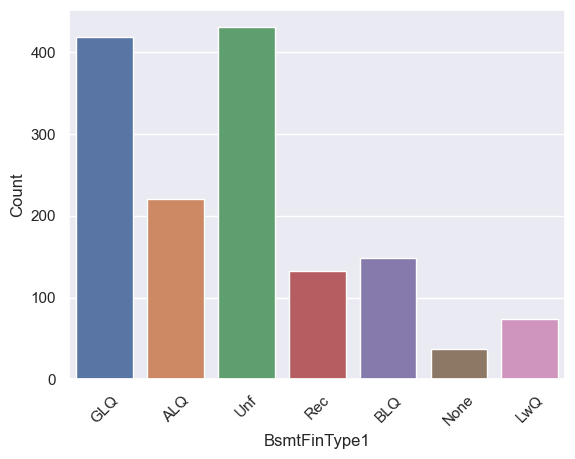

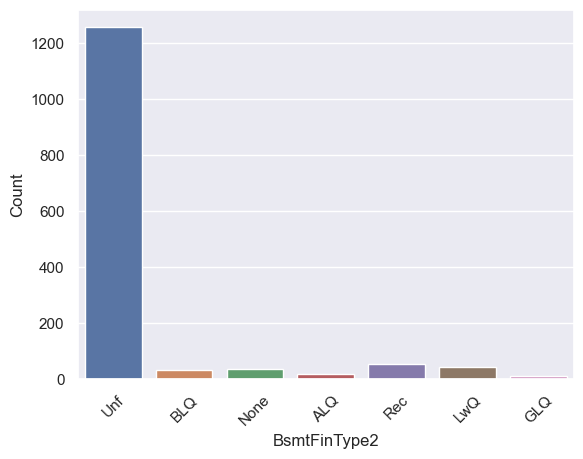

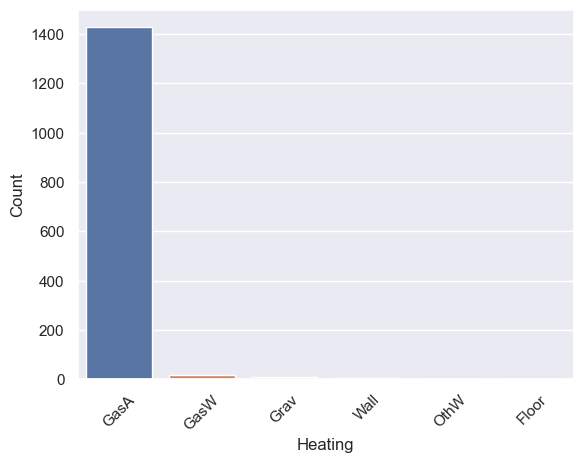

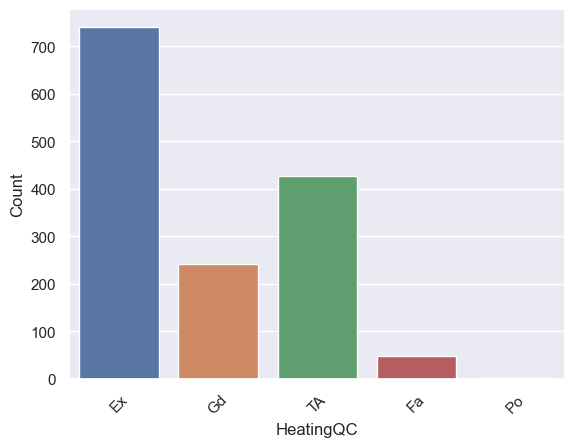

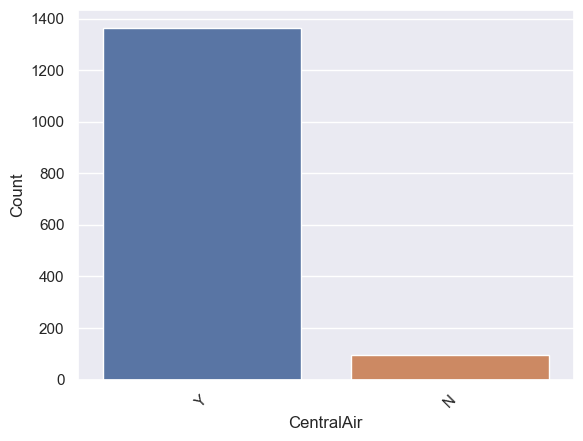

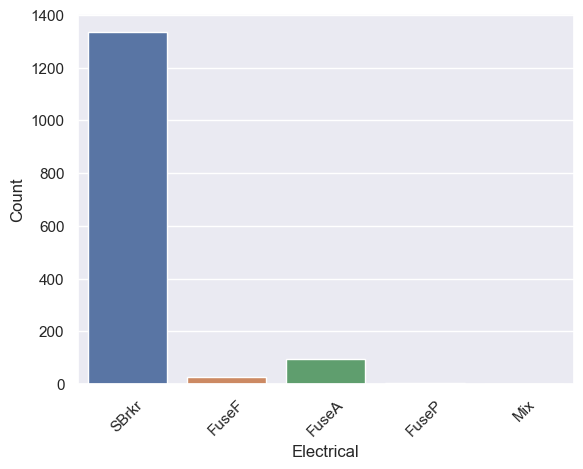

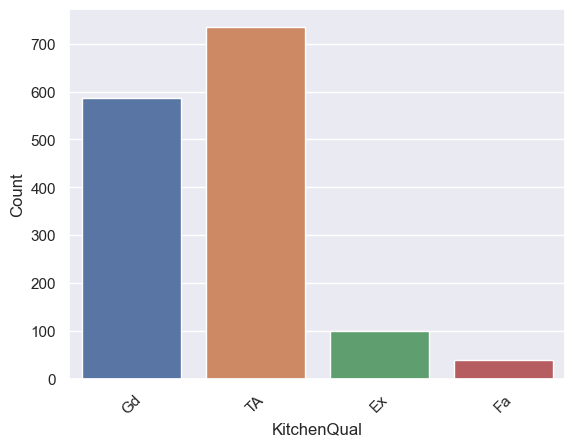

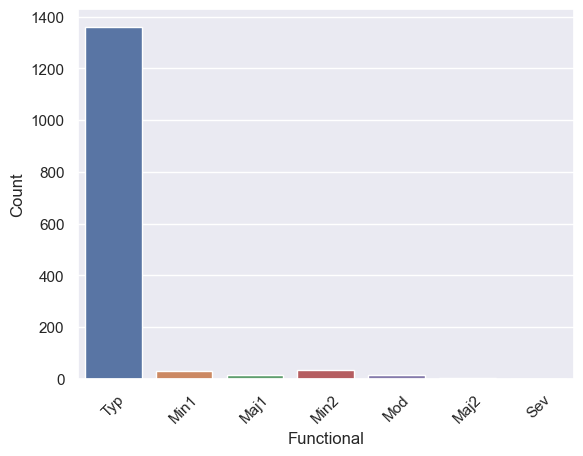

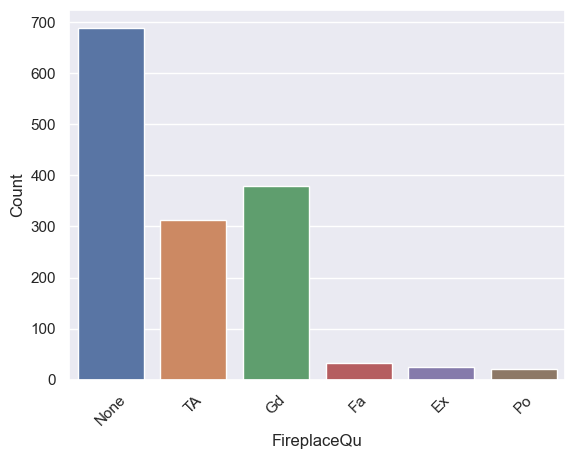

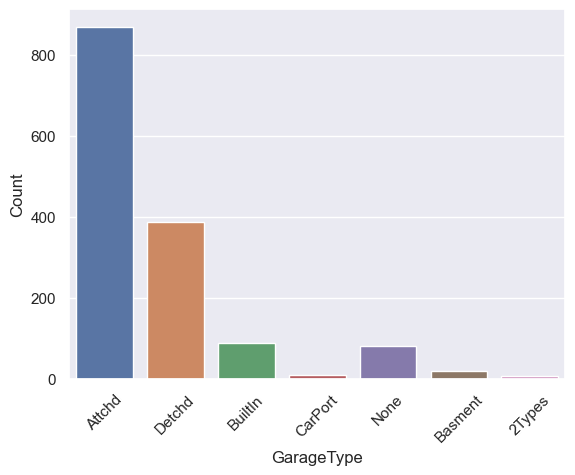

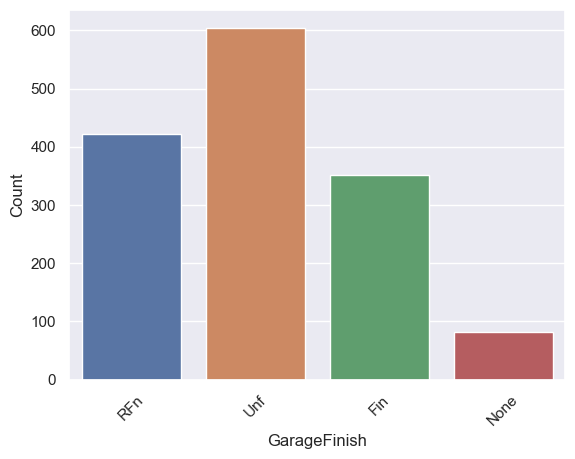

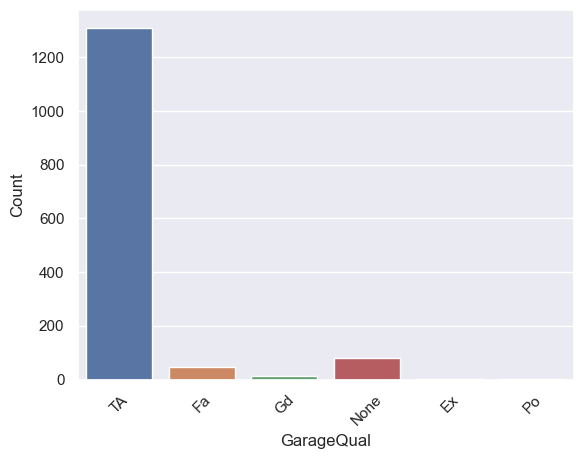

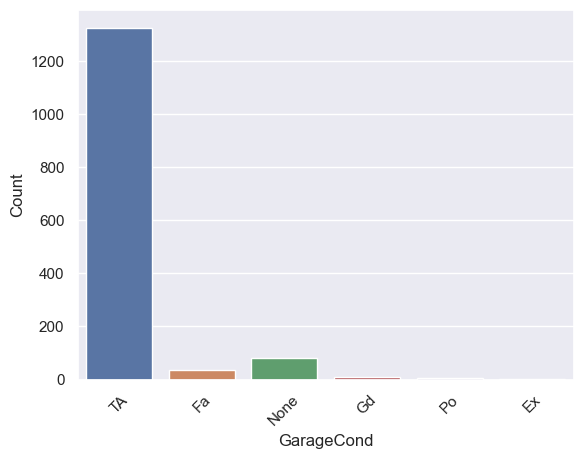

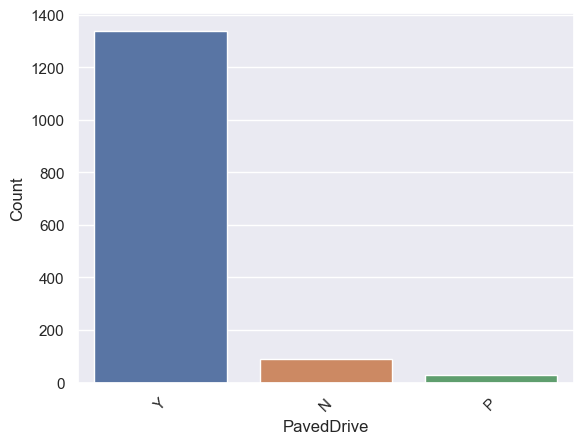

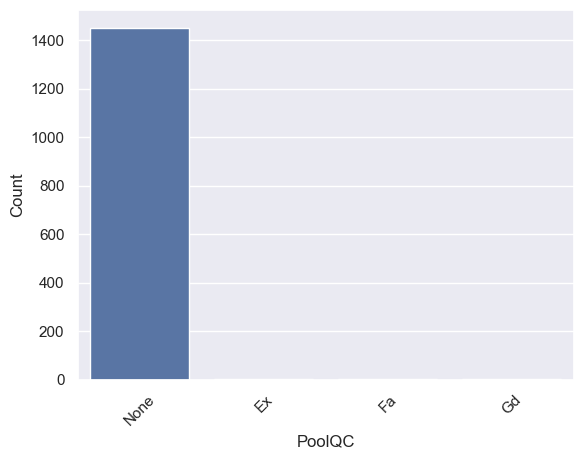

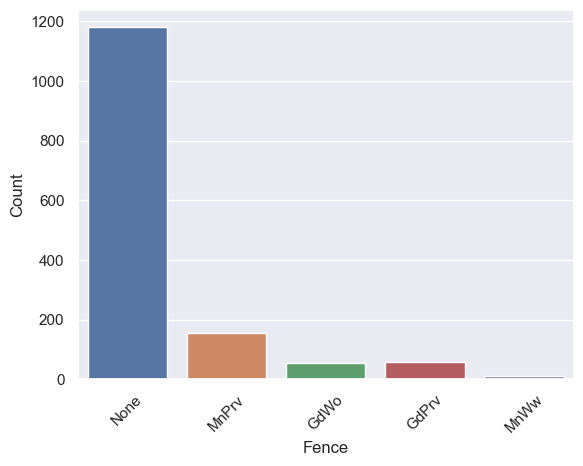

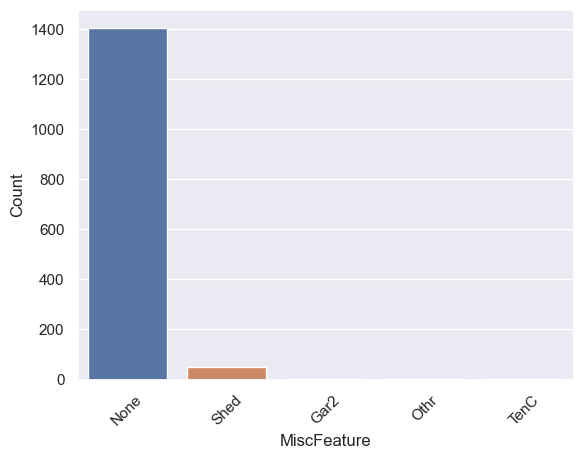

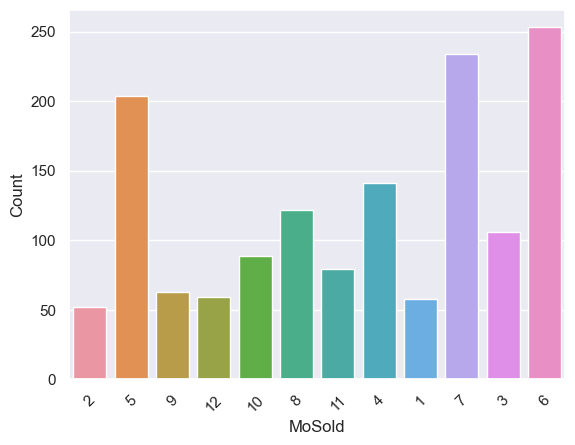

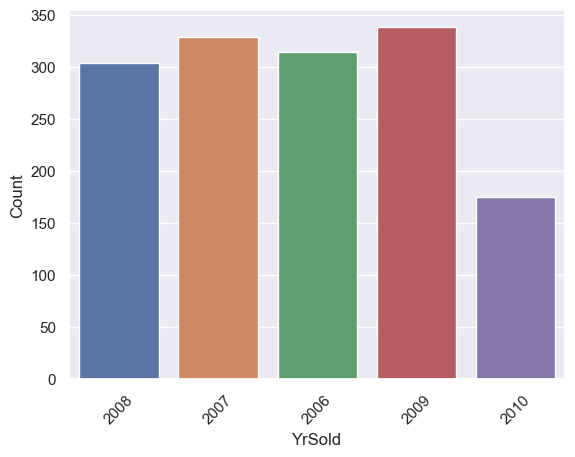

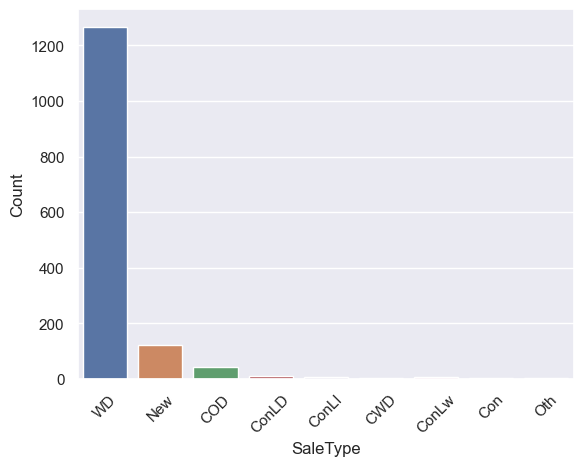

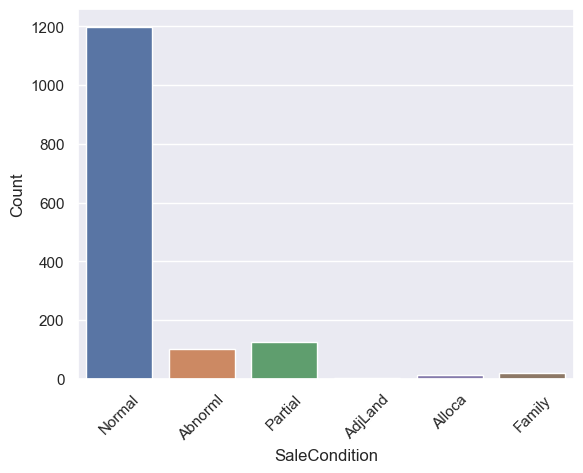

In [148]:
for col in categorical_columns:
    sns.countplot(x=col, data = houseprice_df)
    plt.xlabel(col) 
    plt.ylabel("Count") 
    plt.xticks(rotation=45) 
    plt.show()
    

#### From the above plot we observe that some columns have very less count and thus that feature may not be very helpful in determining house proce. Hence dropping those

In [150]:
['Street', 'Utilities', 'PoolArea', 'PoolQC']

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [149]:
houseprice_df['Street'].value_counts()
houseprice_df['Utilities'].value_counts()
houseprice_df['PoolArea'].value_counts()
houseprice_df['PoolQC'].value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [151]:
houseprice_df.drop(['Street', 'Utilities', 'PoolArea', 'PoolQC'], axis=1, inplace = True)

In [152]:
#Drop Id column
houseprice_df.drop(['Id'], axis=1, inplace = True)

In [153]:
categorcial_columns = houseprice_df.dtypes[houseprice_df.dtypes =='object']
categorcial_columns.index

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

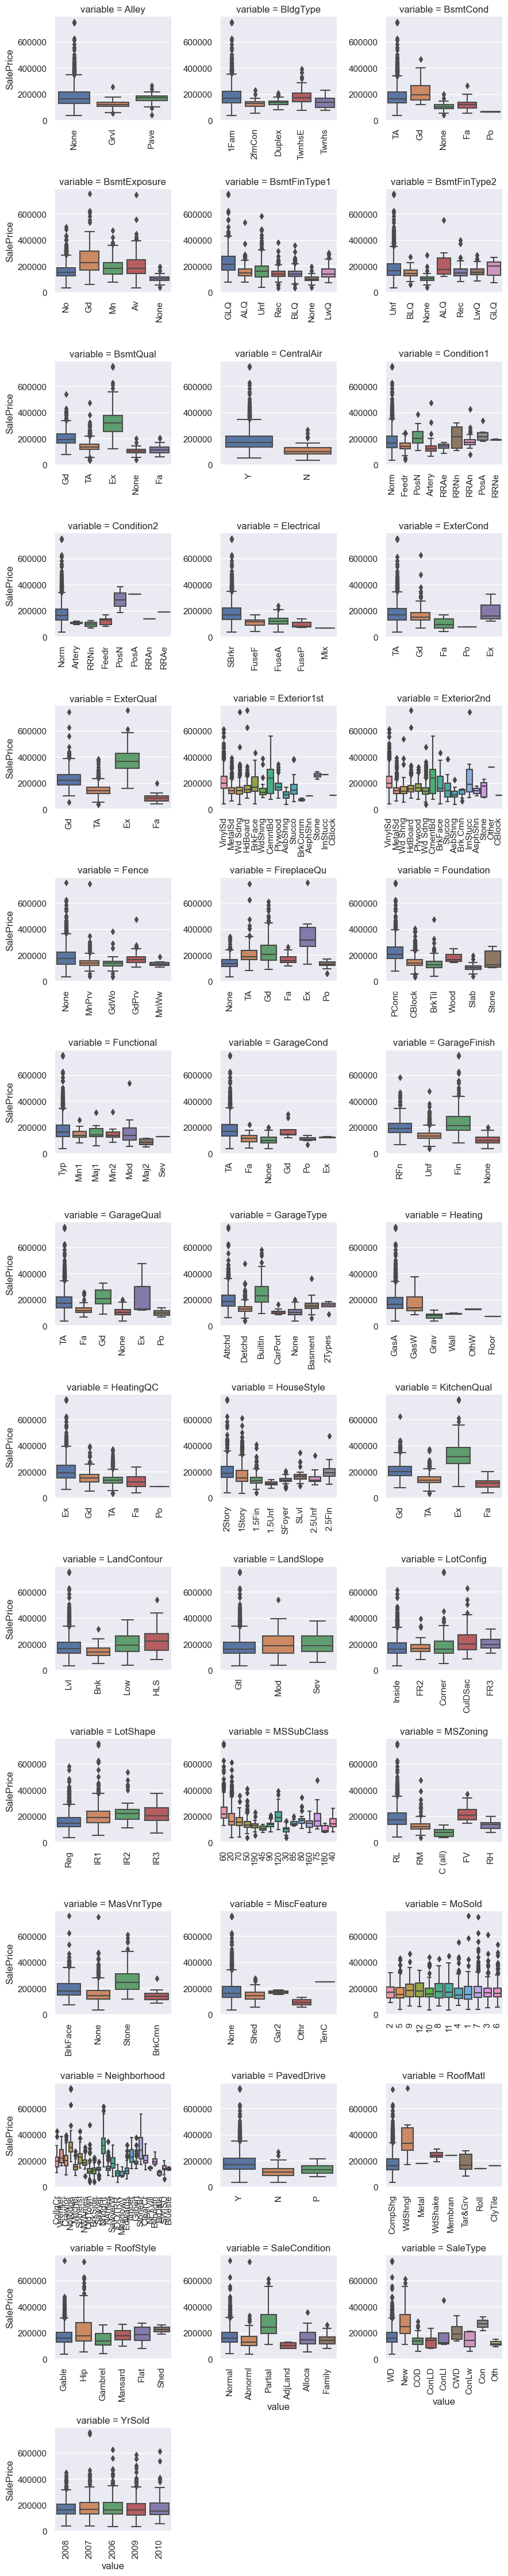

In [154]:
categorical_columns = houseprice_df.dtypes[houseprice_df.dtypes =='object']
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(houseprice_df, id_vars=['SalePrice'], value_vars=sorted(categorical_columns.index))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

There are a few outliers

Paved alleys properties demand a higher price.

Houses where the basement quality is good and excellent are sold at higher prices compared to others.

Houses with good and excellent garages are sold at higher prices.

Houses with good quality kitchens also impact the price in a postive way.

### Removing outliers

In [155]:
numerical_columns =  houseprice_df.select_dtypes(include=['int64','float64'])
numerical_columns

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
0          196.0         706           0        150  ...           0   
1            0.0         978           0        284  ...         298   
2          162.0         486           0        434  ...           0   
3            0.0         216           0        540  ...           0   
4          350.0         655           0        490  ...         192   
...          ...         ...         ...        ...  ...         ...   
1455         0.0           0           0        953  ...           0   
1456       119.0         790         163        589  ...         349   
1457         0.0         275           0        877  ...           0   
1458         0.0          49        1029          0  ...         366   
1459         0.0         830         290        136  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  SalePrice  \
0              61              0          0            0        0     208500   
1               0              0          0            0        0     181500   
2              42              0          0            0        0     223500   
3              35            272          0            0        0     140000   
4              84              0          0            0        0     250000   
...           ...            ...        ...          ...      ...        ...   
1455           40              0          0            0        0     175000   
1456            0              0          0            0        0     210000   
1457           60              0          0            0     2500     266500   
1458            0            112          0            0        0     142125   
1459           68              0          0            0        0     147500   

      garage_age  age  remodel_age  
0            5.0    5            5  
1           31.0   31           31  
2            7.0    7            6  
3            8.0   91           36  
4            8.0    8            8  
...          ...  ...          ...  
1455         8.0    8            7  
1456        32.0   32           22  
1457        69.0   69            4  
1458        60.0   60           14  
1459        43.0   43           43  

[1460 rows x 35 columns]

In [156]:
def drop_outliers(dataset):
    for col in numerical_columns:
        Q1 = dataset[col].quantile(.25)
        Q3 = dataset[col].quantile(.99)
        IQR = Q3-Q1
        dataset =  dataset[(dataset[col] >= (Q1-(1.5*IQR))) & (dataset[col] <= (Q3+(1.5*IQR)))] 
    return dataset   

houseprice_df = drop_outliers(houseprice_df)

In [157]:
houseprice_df.shape

(1365, 78)

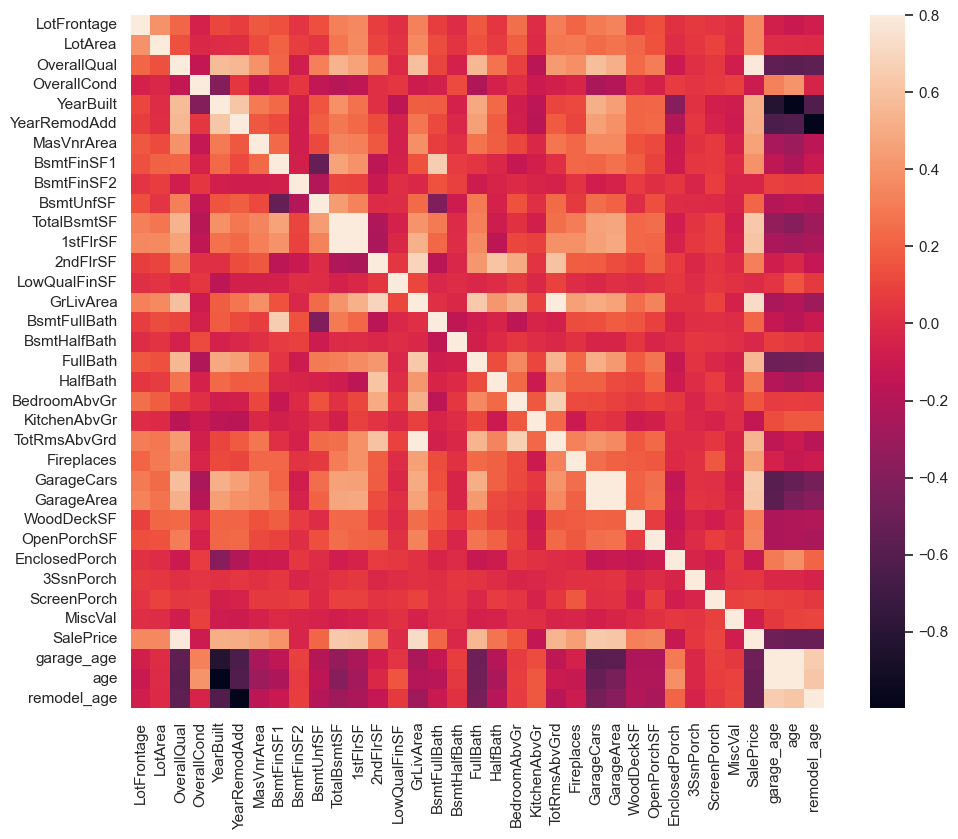

In [158]:
#correlation matrix
corrmat = houseprice_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

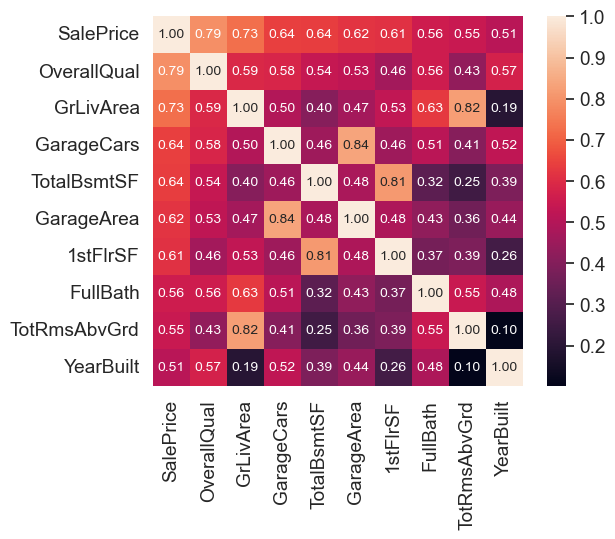

In [159]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(houseprice_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The above heatmap gives 10 highly correlated features with SalesPrice - LIving area, overallquality,Garage, Age of property..

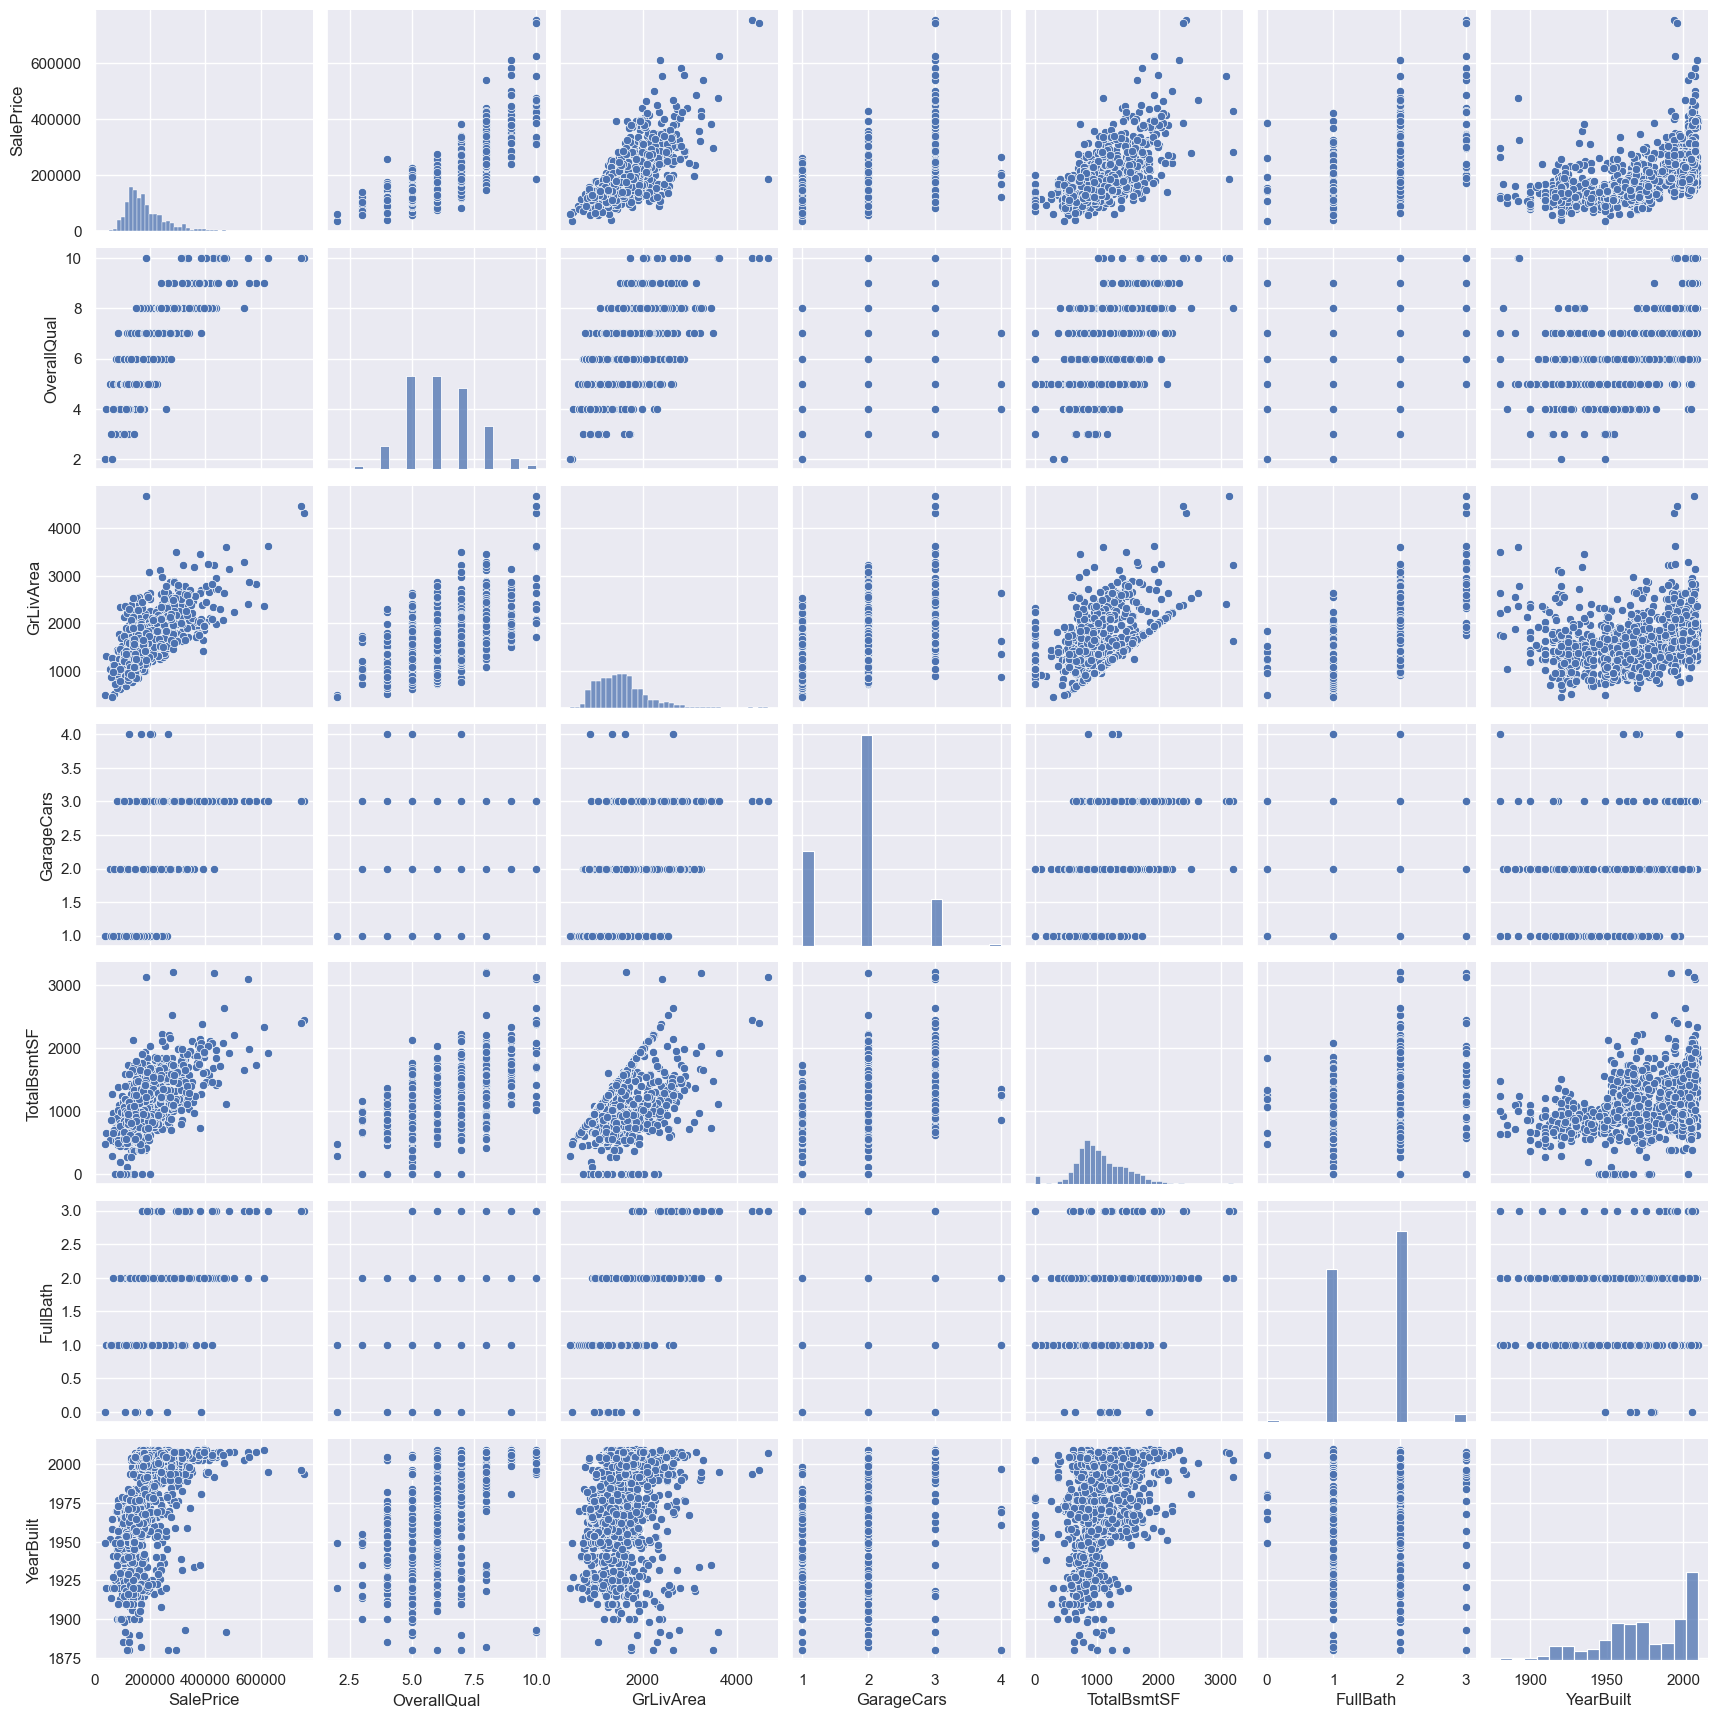

In [161]:
#scatterplot for the highly correlated variables
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(houseprice_df[cols], size = 2.5)
plt.show();

### Dummy Variables creation

In [162]:
categorical_columns =  houseprice_df.select_dtypes(include='object')
categorical_columns.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [163]:
dummy_col = pd.get_dummies(houseprice_df[categorical_columns.columns],drop_first=True)

houseprice_df = pd.concat([houseprice_df,dummy_col],axis=1)

In [164]:
## Dropping actual columns after dummy variable creation for those
houseprice_df = houseprice_df.drop(houseprice_df[categorical_columns.columns],axis=1)

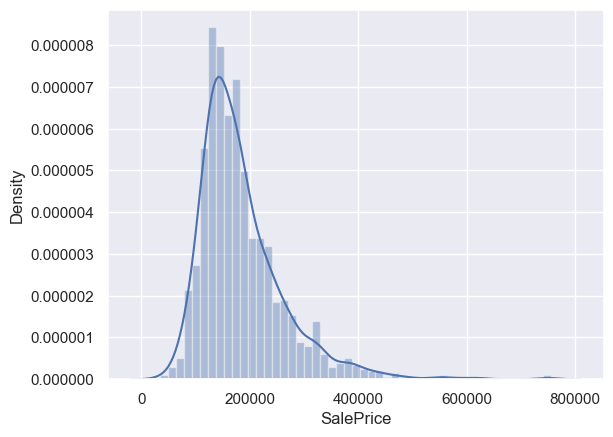

In [166]:
#Distribution of Target Variable
sns.distplot(houseprice_df["SalePrice"])
plt.show()

The price is right skewed hence applying log transformation it

<Axes: xlabel='SalePrice', ylabel='Density'>

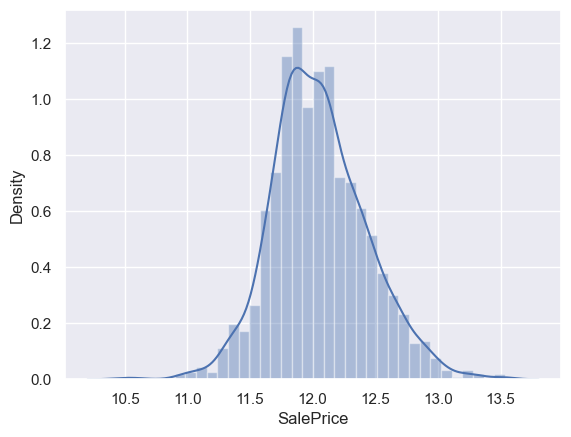

In [167]:
sns.distplot(np.log(houseprice_df["SalePrice"]))

Sale price seems to be right skewed applying logarithamic transform make it normally distributed.

In [168]:
houseprice_df["TransformedPrice"] = np.log(houseprice_df["SalePrice"])

## Model Building

#### Splitting data into input and output variable

In [169]:
X = houseprice_df.drop(['SalePrice','TransformedPrice'],axis=1)
y = houseprice_df["TransformedPrice"].values

In [171]:
# Checking co-related features
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

OverallQual           ExterQual_TA            -0.675991
YearBuilt             YearRemodAdd             0.622450
                      garage_age              -0.825398
                      age                     -0.998981
                      remodel_age             -0.623170
                                                 ...   
SaleType_New          SaleCondition_Normal    -0.667404
                      SaleCondition_Partial    0.986439
SaleType_WD           SaleCondition_Normal     0.649890
                      SaleCondition_Partial   -0.778669
SaleCondition_Normal  SaleCondition_Partial   -0.676580
Length: 113, dtype: float64


In [125]:
houseprice_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       ...
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'YrBltAndRemod', 'Total_sqr_footage', 'Total_Bathrooms',
       'Total_porch_sf'],
      dtype='object', length=319)

In [126]:
X.MSZoning.value_counts()

RL         1087
RM          193
FV           65
RH           12
C (all)       8
Name: MSZoning, dtype: int64

In [172]:

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [173]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [174]:
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     0.161491  0.216251        0.375     0.571429   0.592308      0.783333   
1     0.298137  0.057169        0.625     0.428571   0.815385      0.600000   
2     0.173913  0.200919        0.750     0.428571   0.976923      0.950000   
3     0.242236  0.093578        0.375     0.428571   0.653846      0.250000   
4     0.298137  0.176012        0.375     0.571429   0.653846      0.250000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0    0.000000    0.583638    0.000000   0.096145  ...             0.0   
1    0.000000    0.494516    0.000000   0.172318  ...             0.0   
2    0.060958    0.424589    0.000000   0.258244  ...             0.0   
3    0.000000    0.292962    0.000000   0.086856  ...             0.0   
4    0.082729    0.255941    0.332742   0.000000  ...             0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.0           0.0          1.0   
1             0.0           0.0           0.0          1.0   
2             0.0           0.0           0.0          1.0   
3             0.0           0.0           0.0          1.0   
4             0.0           0.0           0.0          1.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   0.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 271 columns]

In [175]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9623926955133493
Testing R2
-1.1610585048026036e+21


In [81]:
lr.coef_

array([ 0.00000000e+00,  0.00000000e+00,  5.45251214e-01,  1.38547792e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.60076692e-01,
        0.00000000e+00,  0.00000000e+00,  2.79413636e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  9.26974059e-01,  1.19463129e-02,
       -0.00000000e+00,  0.00000000e+00,  2.27570609e-02,  0.00000000e+00,
       -0.00000000e+00,  1.91519151e-04,  0.00000000e+00,  1.13689208e-01,
        6.82480147e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -9.92761841e-02, -1.20121183e-02, -0.00000000e+00,
       -0.00000000e+00,  2.24893677e-02, -1.41600372e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.27701779e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.41620182e-02, -7.82982031e-02,
       -0.00000000e+00,  

We see that without any feature selection linear regression model is performing badly.
Let us try regularization methods.

### Ridge Regression

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [178]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [179]:
#If alpha=0 then overfitting [Unregularised Model]
#Higher the alpha more the regularization more the underfitting
#Lower the alpha lesser the regularization more the overfitting
lr = Ridge(alpha=2)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9556328316269443
Testing R2
0.8629042055778197


In [180]:
lr.coef_

array([ 0.08109812,  0.19709451,  0.30153957,  0.21542331,  0.06912456,
        0.03592942,  0.03308187,  0.18411615,  0.06329783,  0.06838029,
        0.19418924,  0.29708301,  0.2091721 ,  0.02322683,  0.31552445,
        0.03524627, -0.01838644,  0.10049565,  0.0576945 ,  0.00620878,
       -0.05459891,  0.05267906,  0.04463201,  0.07064453,  0.11637063,
        0.06266443,  0.05359655,  0.04961649,  0.00705424,  0.11064128,
        0.02651715,  0.00492119, -0.07038603, -0.03748951, -0.07466673,
       -0.02420476, -0.03322708,  0.04742761, -0.01540638,  0.01498141,
       -0.01222779, -0.00177023,  0.00086172,  0.05075237,  0.01981835,
       -0.02339916, -0.01239871, -0.01648702,  0.12737363,  0.03920478,
        0.10054805,  0.04639212, -0.00129789,  0.05521631,  0.00532733,
        0.01314987, -0.0054522 , -0.01386188, -0.0420683 , -0.00988031,
        0.03528342, -0.02987125, -0.00217418, -0.00291272,  0.0078115 ,
       -0.01598673, -0.00520338, -0.00469768,  0.02096198,  0.04

Fitting 11 folds for each of 28 candidates, totalling 308 fits


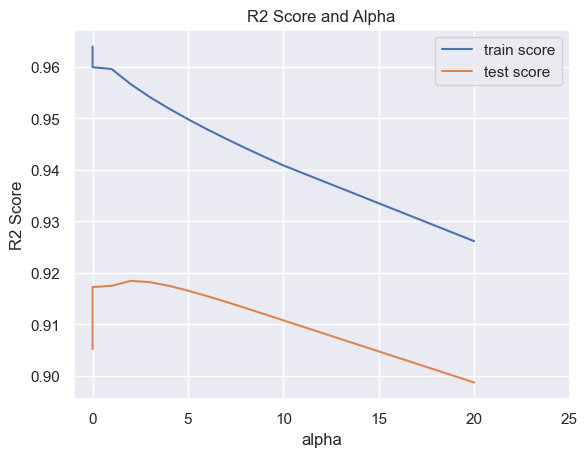

In [181]:
# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

Checked the alpha with both R2 and Negative mean absolute dquare scoring criteria

In [184]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [185]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [186]:
## Doubling alpha to see the changes
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Training Mean Square Error ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Testing Mean Square Error ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

Training Mean Square Error  0.006961666699060791
Testing Mean Square Error  0.01992999812014346


In [187]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8629042055778197
The MSE of the model on the test dataset for optimum alpha is 0.020209199621889835


## Lasso

In [188]:
# Creating a model with an arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train, y_train) 

y_test_pred = lasso1.predict(X_test)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is 0.8585343191044578
The MSE of the model on the test dataset for optimum alpha is 0.02085336167250106


Fitting 11 folds for each of 11 candidates, totalling 121 fits


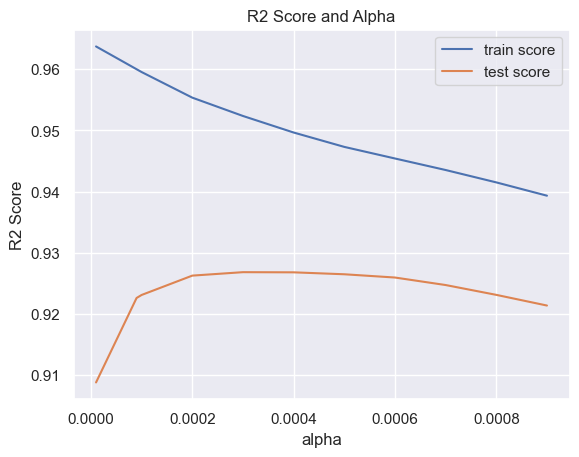

The optimum value of alpha is 0.0003
The R2 Score on the test dataset for optimum alpha is 0.85842961102342
The MSE on the test dataset for optimum alpha is 0.020868796620893432


In [189]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation with grid search cv
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum value of alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test)
print('The R2 Score on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [125]:
lasso_final2.coef_

array([ 4.97062637e-02,  2.49869468e-01,  4.07252958e-01,  2.43773556e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.38569552e-01,
        1.61678350e-02, -0.00000000e+00,  2.84632353e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  9.85010817e-01,  3.35433181e-02,
       -2.63636588e-03,  5.27593538e-02,  4.55560701e-02,  0.00000000e+00,
       -6.25141061e-02,  0.00000000e+00,  4.76962630e-03,  6.46575471e-02,
        9.34997543e-02,  5.15218955e-02,  3.80828456e-02,  1.82082987e-02,
       -0.00000000e+00,  1.03164593e-01, -0.00000000e+00, -0.00000000e+00,
       -1.71760151e-01, -6.06071988e-02, -5.89310595e-02, -0.00000000e+00,
       -0.00000000e+00,  3.61415425e-02, -1.14751006e-02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  2.33889228e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -6.69369520e-03,
        8.89806325e-02,  0.00000000e+00,  6.26231141e-02,  0.00000000e+00,
       -0.00000000e+00,  

In [190]:
#Displaying the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

Lasso Co-Efficient
GrLivArea                        0.985011
OverallQual                      0.407253
TotalBsmtSF                      0.284632
LotArea                          0.249869
OverallCond                      0.243774
BsmtFinSF1                       0.138570
ScreenPorch                      0.103165
Neighborhood_Crawfor             0.102674
GarageArea                       0.093500
Neighborhood_StoneBr             0.090528
MSZoning_FV                      0.088981
Exterior1st_BrkFace              0.080019
SaleCondition_Normal             0.070222
Functional_Typ                   0.069358
GarageCars                       0.064658
MSZoning_RL                      0.062623
SaleCondition_Partial            0.058213
Neighborhood_NridgHt             0.055346
FullBath                         0.052759
BsmtExposure_Gd                  0.051929

In [105]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef),columns=X_train.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
GrLivArea                       0.315524
OverallQual                     0.301540
1stFlrSF                        0.297083
OverallCond                     0.215423
2ndFlrSF                        0.209172
LotArea                         0.197095
TotalBsmtSF                     0.194189
BsmtFinSF1                      0.184116
MSZoning_FV                     0.127374
GarageArea                      0.116371
Neighborhood_StoneBr            0.112973
Exterior1st_BrkFace             0.112694
ScreenPorch                     0.110641
Neighborhood_Crawfor            0.101448
MSZoning_RL                     0.100548
FullBath                        0.100496
LotFrontage                     0.081098
SaleCondition_Normal            0.071703
GarageCars                      0.070645
SaleType_CWD                    0.070447

#### After analysing both Ridge and Lasso model the best features which define sales price are

Total Living area in square foot

Total Garage Area

Total Rooms

Overall Condition

Lot Area

Car Garage

Normal Sale Condition

Exterior brick face

Basement Quality

### Solving for subjective questions

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Alpha Values
Ridge = 2.0
Lasso = 0.0003

In [191]:
lr = Ridge(alpha=2)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9556328316269443
Testing R2
0.8629042055778197


In [108]:
lr = Ridge(alpha=4)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9512763479683498
Testing R2
0.864798261374286


In [114]:
# Building Ridge Model by doubling the value of alpha to 4
ridge_double = Ridge(alpha=4,random_state=100)
ridge_double.fit(X_train,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.864798261374286
The MSE of the model on the test dataset for doubled alpha is 0.01992999812014346
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
OverallQual                                   0.277848
GrLivArea                                     0.266122
1stFlrSF                                      0.253249
OverallCond                                   0.187328
TotalBsmtSF                                   0.181465
2ndFlrSF                                      0.173522
BsmtFinSF1                                    0.170865
LotArea                                       0.146173
GarageArea                                    0.114531
FullBath                                      0.109413
Neighborhood_StoneBr                          0.102660
Exterior1st_BrkFace                           0.101370
Neighborhood_Crawfor                          0.099076
ScreenPorch                                   0.097641
MSZoning_FV                                   0.089875
TotRmsAbvGrd                                  0.082212
GarageCars                                    0.076852
LotFrontage                                   0.076491
MSZoning_RL                                   0.074099
Neighborhood_NoRidge                          0.071427

In [111]:
lr = Lasso(alpha=0.0003)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.9509579511240465
Testing R2
0.85842961102342


In [112]:
lr = Lasso(alpha=0.0006)
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.944459189496303
Testing R2
0.8602616444878357


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Removing the columns from the training set and running the model again to see the next 5 most important predictor variables.

In [ ]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test = X_test.drop(['GrLivArea','OverallQual','TotalBsmtSF','OverallCond','LotArea'],axis=1)
X_train = X_train.drop(['GrLivArea','OverallQual','TotalBsmtSF','OverallCond','LotArea'],axis=1)

In [129]:


# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0003,random_state=100)
lasso3.fit(X_train,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.8415685578615217
The MSE of the model on the test dataset is 0.02335427322227465
The most important predictor variables are as follows:


Lasso Co-Efficient
1stFlrSF               0.856653
2ndFlrSF               0.541946
BsmtFinSF1             0.253769
GarageArea             0.120873
ScreenPorch            0.119514